### Libraries import

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
from scipy.stats import zscore
from pandas.plotting import parallel_coordinates, scatter_matrix
from sklearn.preprocessing import StandardScaler

### Reading the dataset

In [30]:
# configure load_wine to split data into features X and labels y
X, y = load_wine(as_frame=True, return_X_y=True)
# deep copy the features
df = X.copy()
# deliberately set targets (labels) to all zeros
df['target'] = 0
# we'll use the true labels in y in the subsequent task!


### Basic info about the dataset

In [31]:
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [32]:
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

       target  
count   178.0  
mean      0.0  
std       0.0  
min       0.0  
25%       0.0  
50%       0.0  
75%       0.0  
max       0.0

# Unlabeled Data

### 1. Display all features in a single plot by using a parallel lines plot or a heatmap.

In [33]:
# plotting th eline plot of every feature in one plot
def generate_line_plot(data_frame):
    return data_frame.plot()

# plotting th eline plot of every feature in separate plots
def gather_data(dataframe ,label : str) -> tuple():
    # all values from given feature
    feature_values = dataframe[label].values.tolist()

    # size of the list
    amount = len(feature_values)

    feature_range = [i for i in range(0, amount)]

    return feature_values, feature_range

def line_plot_data(x_values:list[int], y_values: list[float], ax: plt.axes):

    ax.plot(x_values, y_values)
    ax.set_xlabel("Sample number")


def line_plots_of_features():
    labels = df.columns
    labels = labels[0:-1]
    fig, axs = plt.subplots(3, 5, figsize=(25, 20))
    axs = axs.ravel()

    for i, label in enumerate(labels):
        feature_values, feature_range = gather_data(df, label)
        line_plot_data(feature_range, feature_values, axs[i])
        axs[i].set_title(f'{label} in wine sample')
        axs[i].set_ylabel(f'{label} value')


# for plotting heatmap
def plot_heatmap(data_frame):
    heatmap_df = data_frame.copy()
    heatmap_df = heatmap_df.apply(zscore)
    sns.heatmap(heatmap_df, cmap='coolwarm_r')


# for plotting parallel lines
def plot_parrallel_lines(data_frame, legend, title, iflabel=False):
    unlabeled_df = data_frame.copy()
    if iflabel:
        unlabeled_df['target'] = y
    else:
        unlabeled_df['target'] = 0
    plt.figure(figsize=(12, 8))
    plt.title(title)
    parallel_coordinates(unlabeled_df, 'target', colormap='viridis')
    plt.xticks(rotation=45)
    plt.xlabel('Features')
    plt.ylabel('Feature values')
    plt.legend(loc="upper left", title=legend)


In [34]:
targetless_df = df.copy()
targetless_df.drop(columns='target', inplace=True)

### Line plot of all features

Text(0.5, 0.98, 'Plot lines of every feature in one plot')

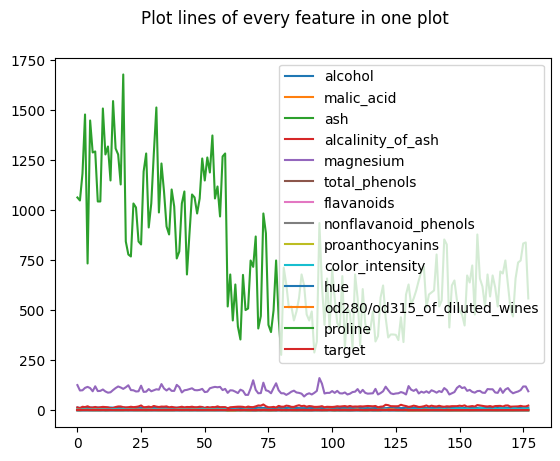

In [35]:
generate_line_plot(df)
plt.suptitle("Plot lines of every feature in one plot")

As we can see the plot is unreadable for most of the measurements. We can only see ash values and magnesium on the scale. Rest of the features overlaps with themselves

### Plot line of each feature

Text(0.5, 0.92, 'Plot lines of every feature in separate plots')

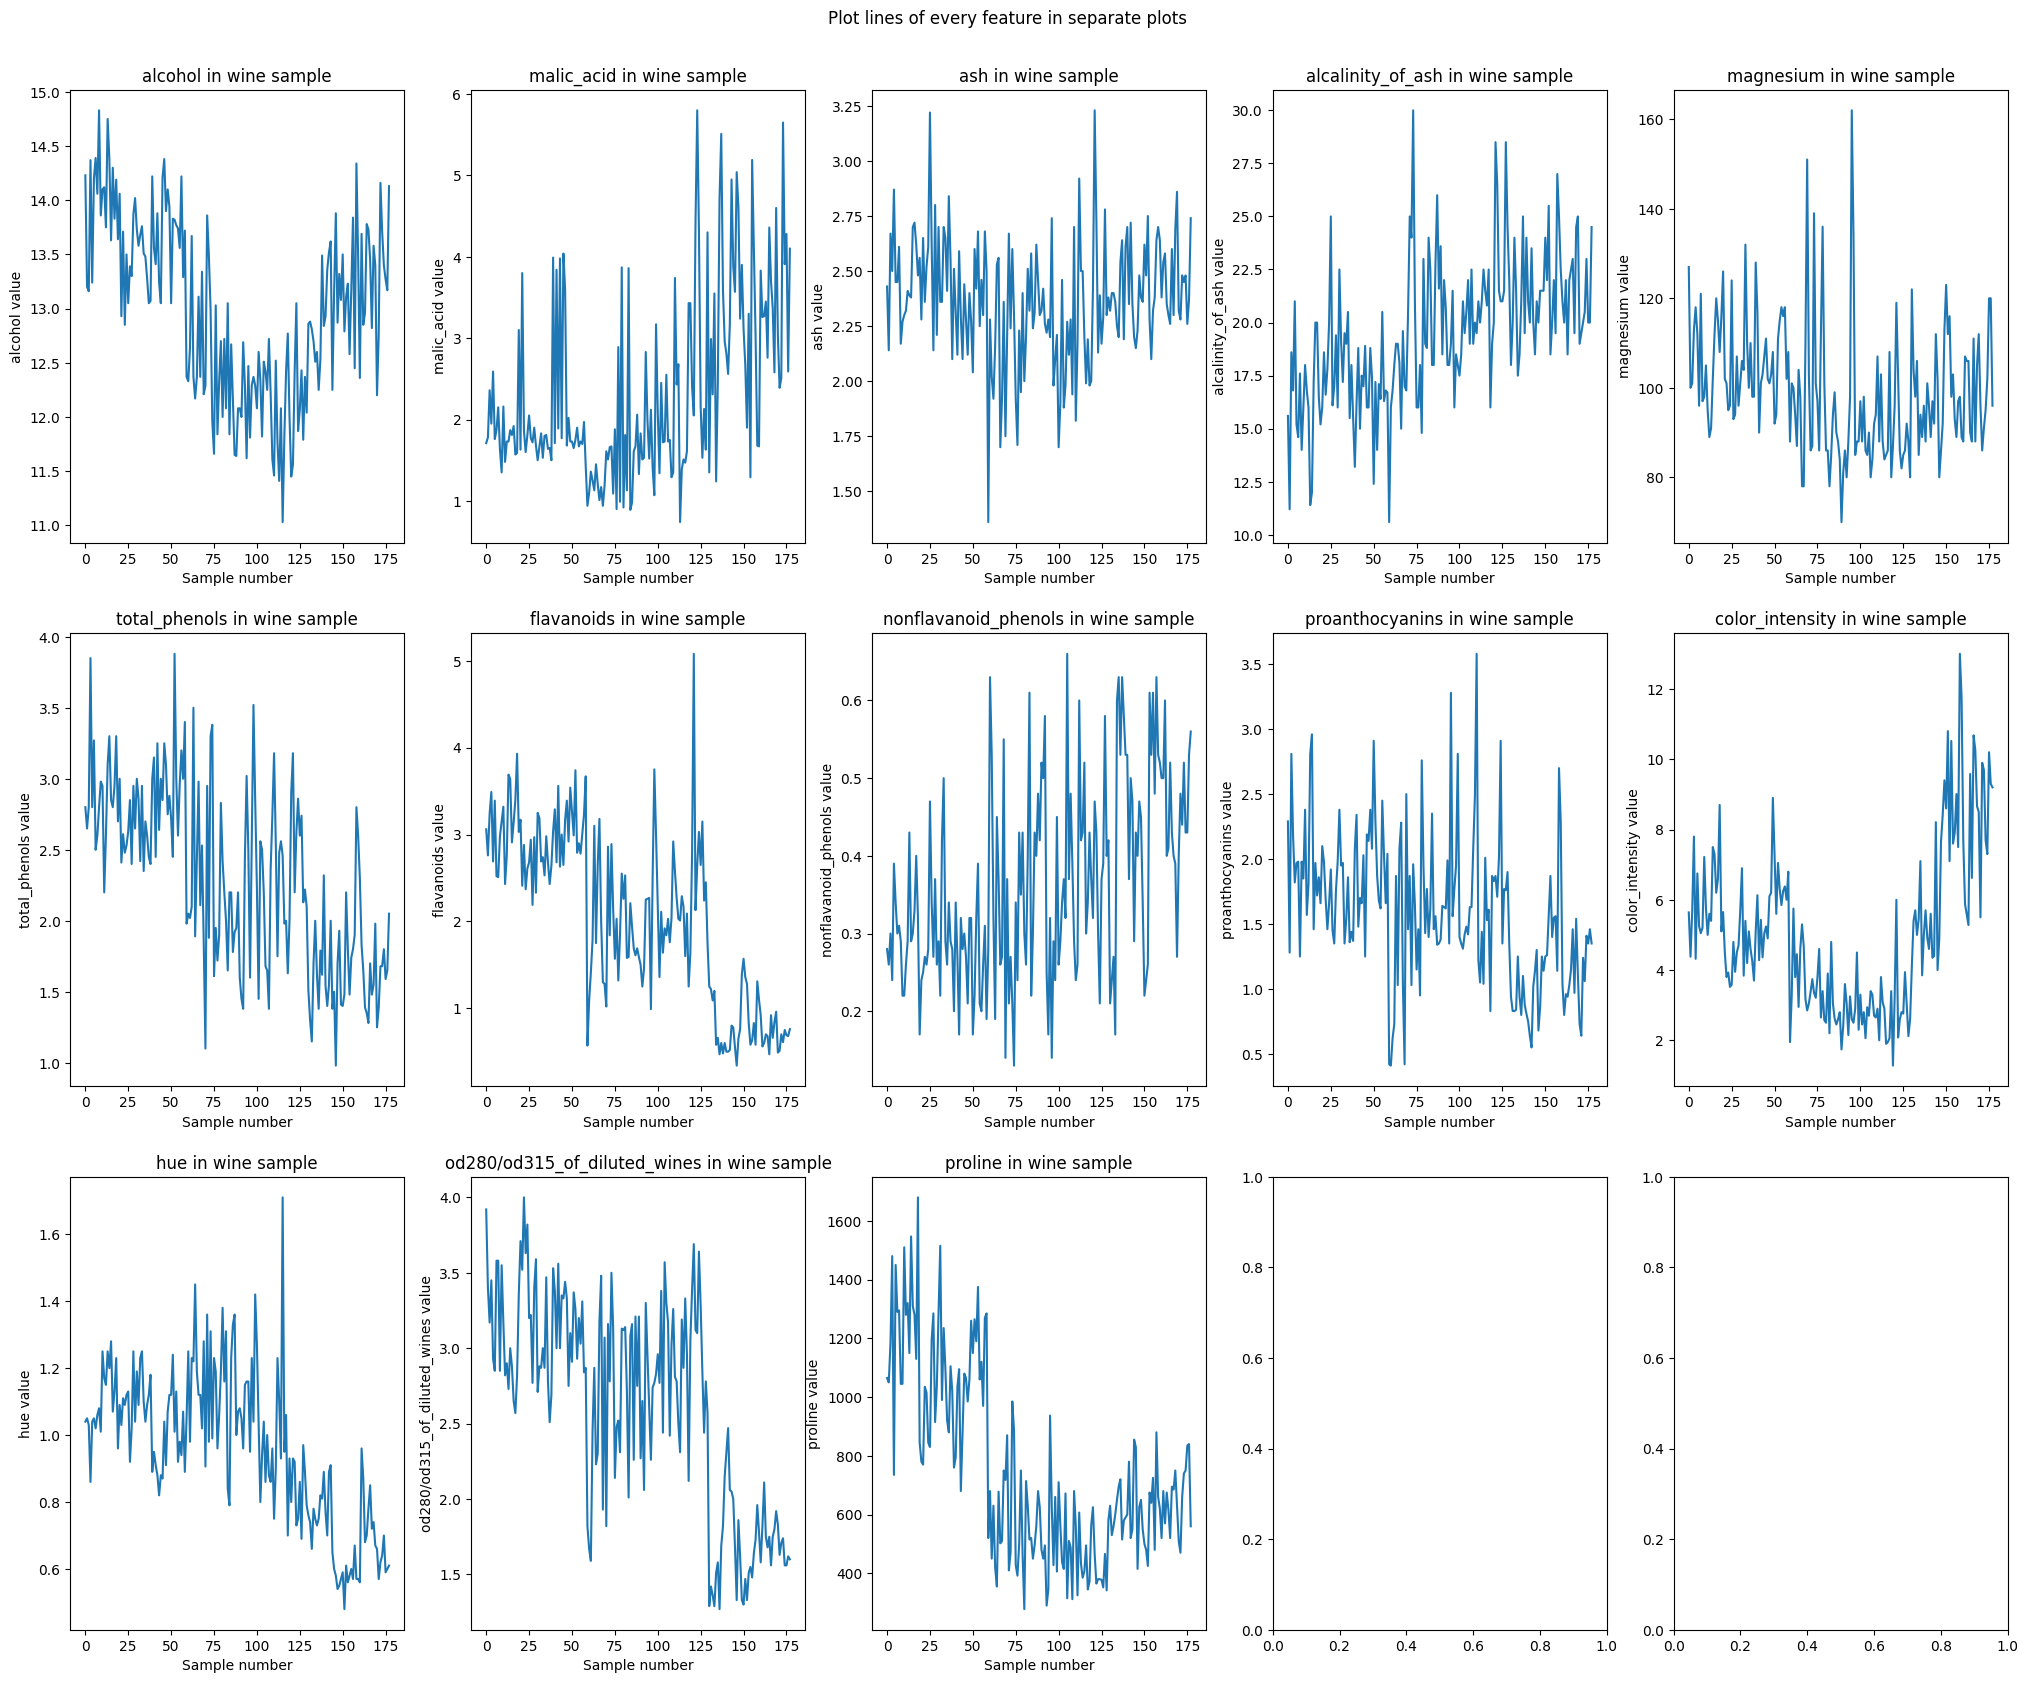

In [36]:
line_plots_of_features()
plt.suptitle("Plot lines of every feature in separate plots", y=0.92)

#### Heatmap

Text(50.722222222222214, 0.5, 'Sample number')

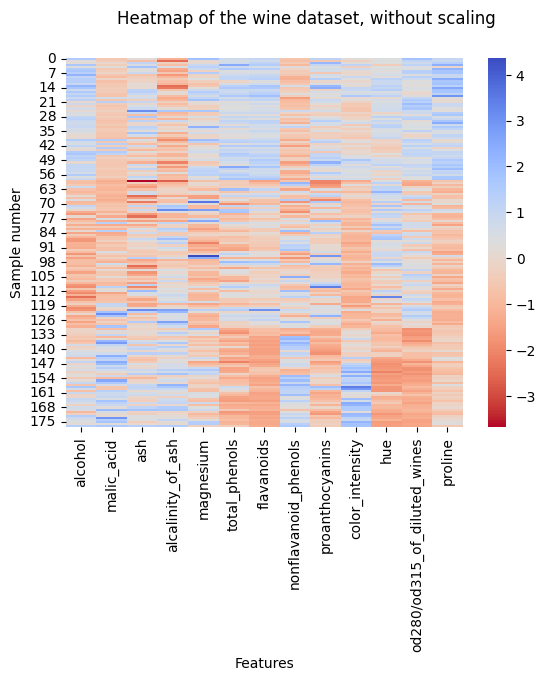

In [37]:
plot_heatmap(targetless_df)

# additional plot operations
plt.suptitle("Heatmap of the wine dataset, without scaling",)
plt.xlabel('Features')
plt.ylabel('Sample number')

#### Parallel lines plot

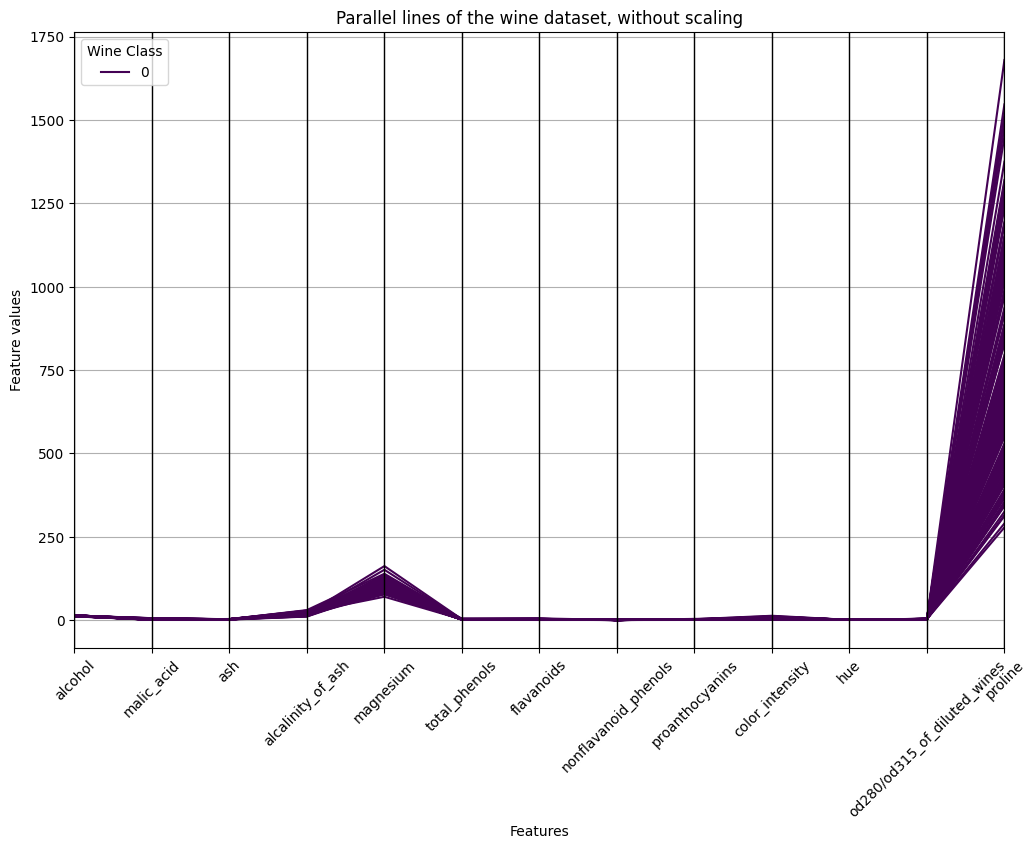

In [38]:
plot_parrallel_lines(df, legend="Wine Class", title="Parallel lines of the wine dataset, without scaling", iflabel=False)

## 2. Decide whether the data needs scaling.

Just by looking at the plots we can see a huge difference between values in some features => it would be better to scale those values, by using for example z-scale

In [39]:
def scale_dataset_z_score(data_frame):
    scaled_df = data_frame.apply(zscore)
    return scaled_df

### 3. Detect any outliers in the features’ distribution through means of a boxplot.

In [40]:
# for generating box plot
def generate_box_plot(data_frame):
    data_frame.boxplot(figsize=(12, 5), grid=True, rot=90)

# for generating box plot wihout proline
def generate_box_plot_without_proline(data_frame):
    box_plot_frame = data_frame.copy()
    box_plot_frame.drop(columns=['proline'], inplace=True)
    box_plot_frame.boxplot(figsize=(12, 5), grid=True, rot=90)

Text(0, 0.5, 'Feature values')

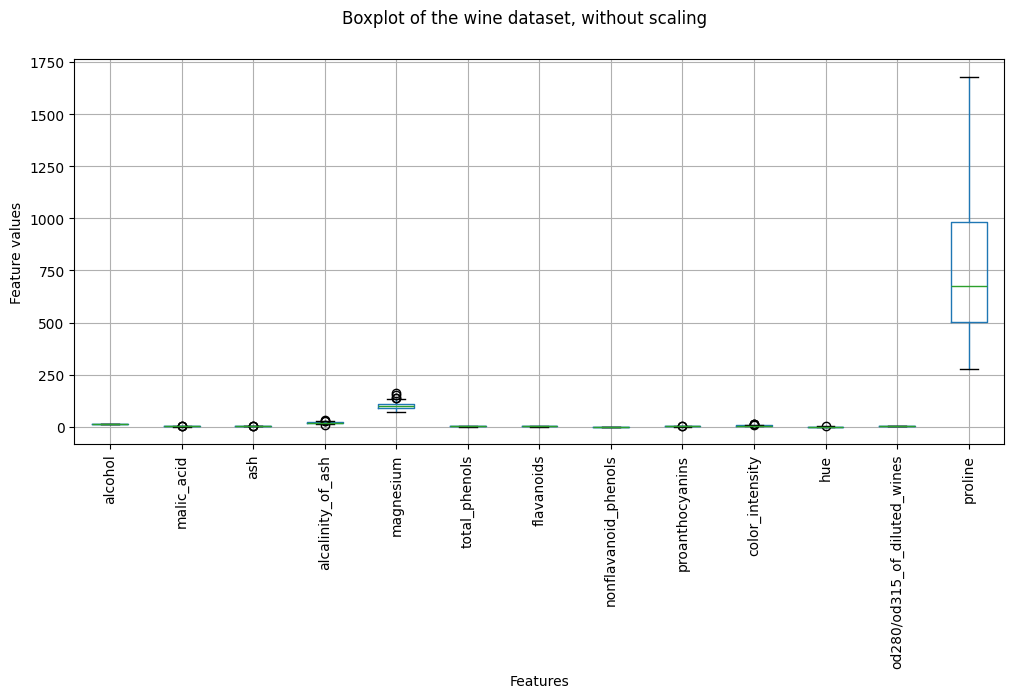

In [41]:
generate_box_plot(targetless_df)
# Additional plot operations
plt.suptitle("Boxplot of the wine dataset, without scaling")
plt.xlabel('Features')
plt.ylabel('Feature values')

Text(0, 0.5, 'Feature values')

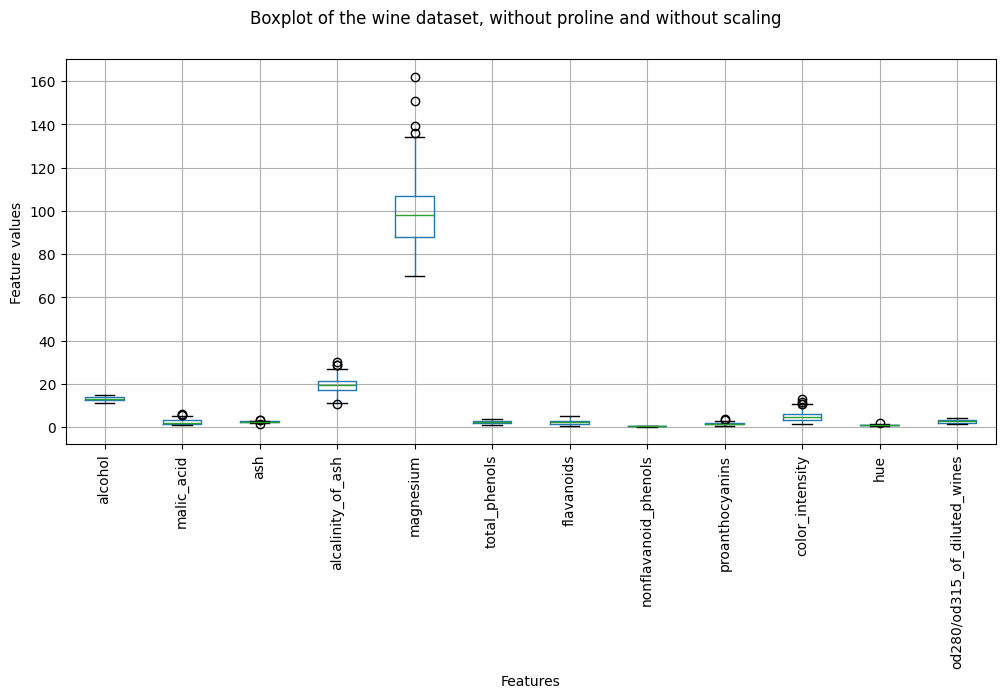

In [42]:
generate_box_plot_without_proline(targetless_df)
plt.suptitle("Boxplot of the wine dataset, without proline and without scaling")
plt.xlabel('Features')
plt.ylabel('Feature values')

We can see outliers in : 
- magnesium
- alcalinity_of_ash
- color intensity
- hue

### 4. Find out which data points have outliers in any feature

In [43]:
# function to calculate outliers using IQR method for a single group
def detect_outliers_iqr(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier condition: values below (Q1 - 1.5 * IQR) or above (Q3 + 1.5 * IQR)
    outliers = (group < (Q1 - 1.5 * IQR)) | (group > (Q3 + 1.5 * IQR))
    return outliers

outliers = detect_outliers_iqr(targetless_df)

outliers_rows = targetless_df[outliers.any(axis=1)]

print(f"Number of outliers: {outliers.sum().sum()}")
print(outliers_rows)

Number of outliers: 21
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
25     13.05        2.05  3.22               25.0      124.0           2.63   
59     12.37        0.94  1.36               10.6       88.0           1.98   
69     12.21        1.19  1.75               16.8      151.0           1.85   
73     12.99        1.67  2.60               30.0      139.0           3.30   
78     12.33        0.99  1.95               14.8      136.0           1.90   
95     12.47        1.52  2.20               19.0      162.0           2.50   
110    11.46        3.74  1.82               19.5      107.0           3.18   
115    11.03        1.51  2.20               21.5       85.0           2.46   
121    11.56        2.05  3.23               28.5      119.0           3.18   
123    13.05        5.80  2.13               21.5       86.0           2.62   
127    11.79        2.13  2.78               28.5       92.0           2.13   
137    12.53        5.51  2.6

### 5. Detect correlations between features (e.g. by plotting a scatter matrix, computing correlation values, . . . ).

In [44]:
# for plotting violin plot
def plot_violin_plot(data_frame):
    plt.figure(figsize=(15, 10))
    sns.violinplot(data_frame)
    plt.xticks(rotation=45)


# for calculating correlation matrix
def calculate_corr_matrix(data_frame):
    copied_df = data_frame.copy()
    corr_matrix = copied_df.corr()
    return corr_matrix

# for plotting correlation matrix
def plot_corr_matrix(corr_matrix):
    plt.figure(figsize=(15, 10))
    sns.pairplot(corr_matrix)

# for plotting heatmap of correlation matrix
def plot_corr_heatmap(corr_matrix, title=None):
    plt.figure(figsize=(15, 10))
    sns.heatmap(corr_matrix, cmap='RdBu', annot=True)
    plt.title(title)

Text(0, 0.5, 'Feature values')

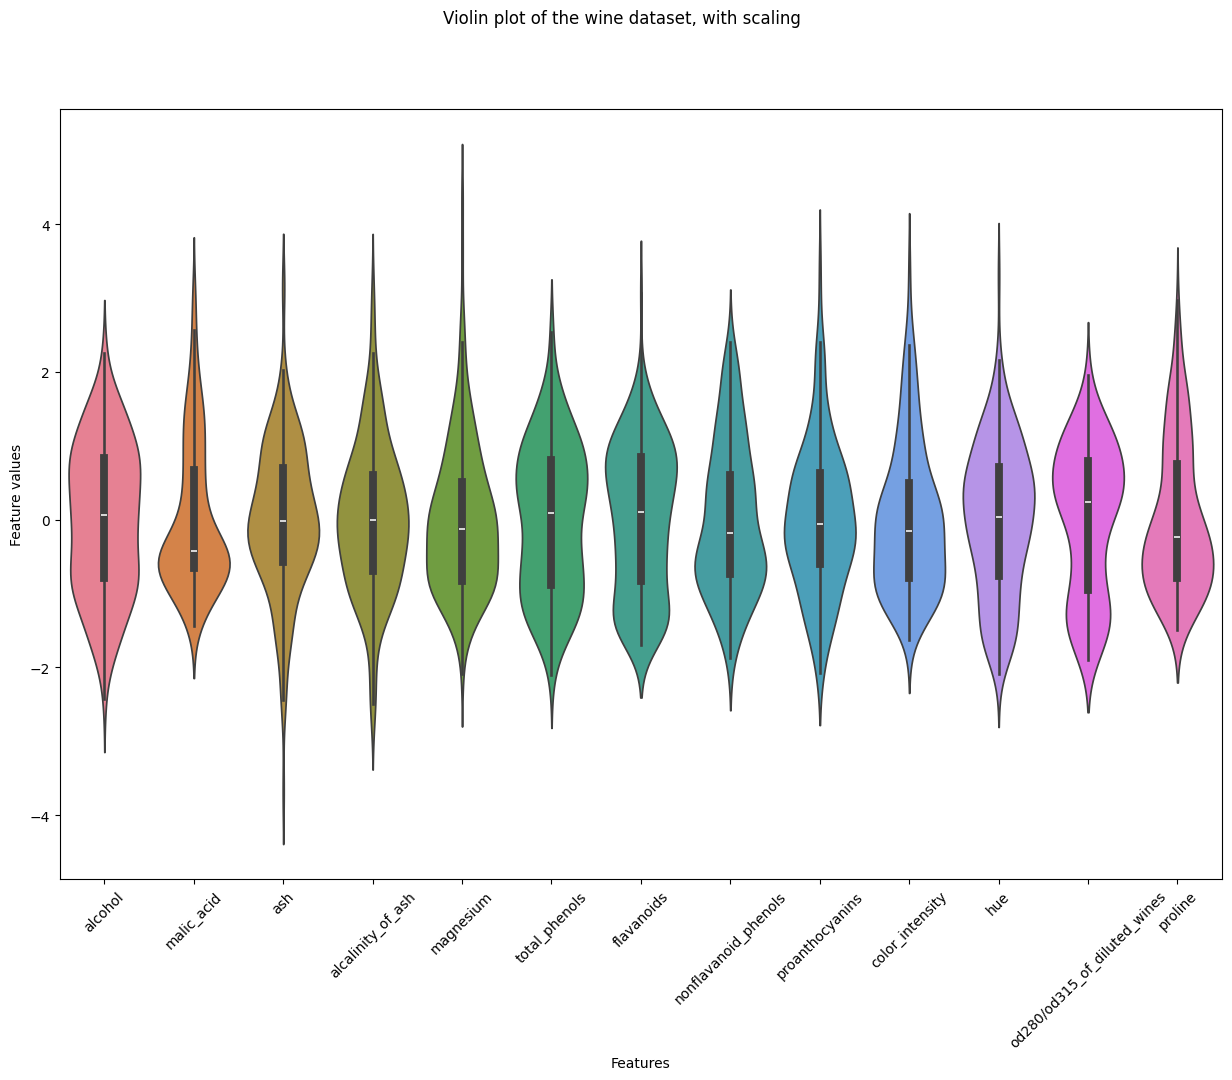

In [45]:
scaled_data_frame = scale_dataset_z_score(targetless_df)
plot_violin_plot(scaled_data_frame)

# Additional plot operations
plt.suptitle("Violin plot of the wine dataset, with scaling")
plt.xlabel('Features')
plt.ylabel('Feature values')


### Corelation matrix

Text(0.5, 1.02, 'Pairplot of the correlation matrix')

<Figure size 1500x1000 with 0 Axes>

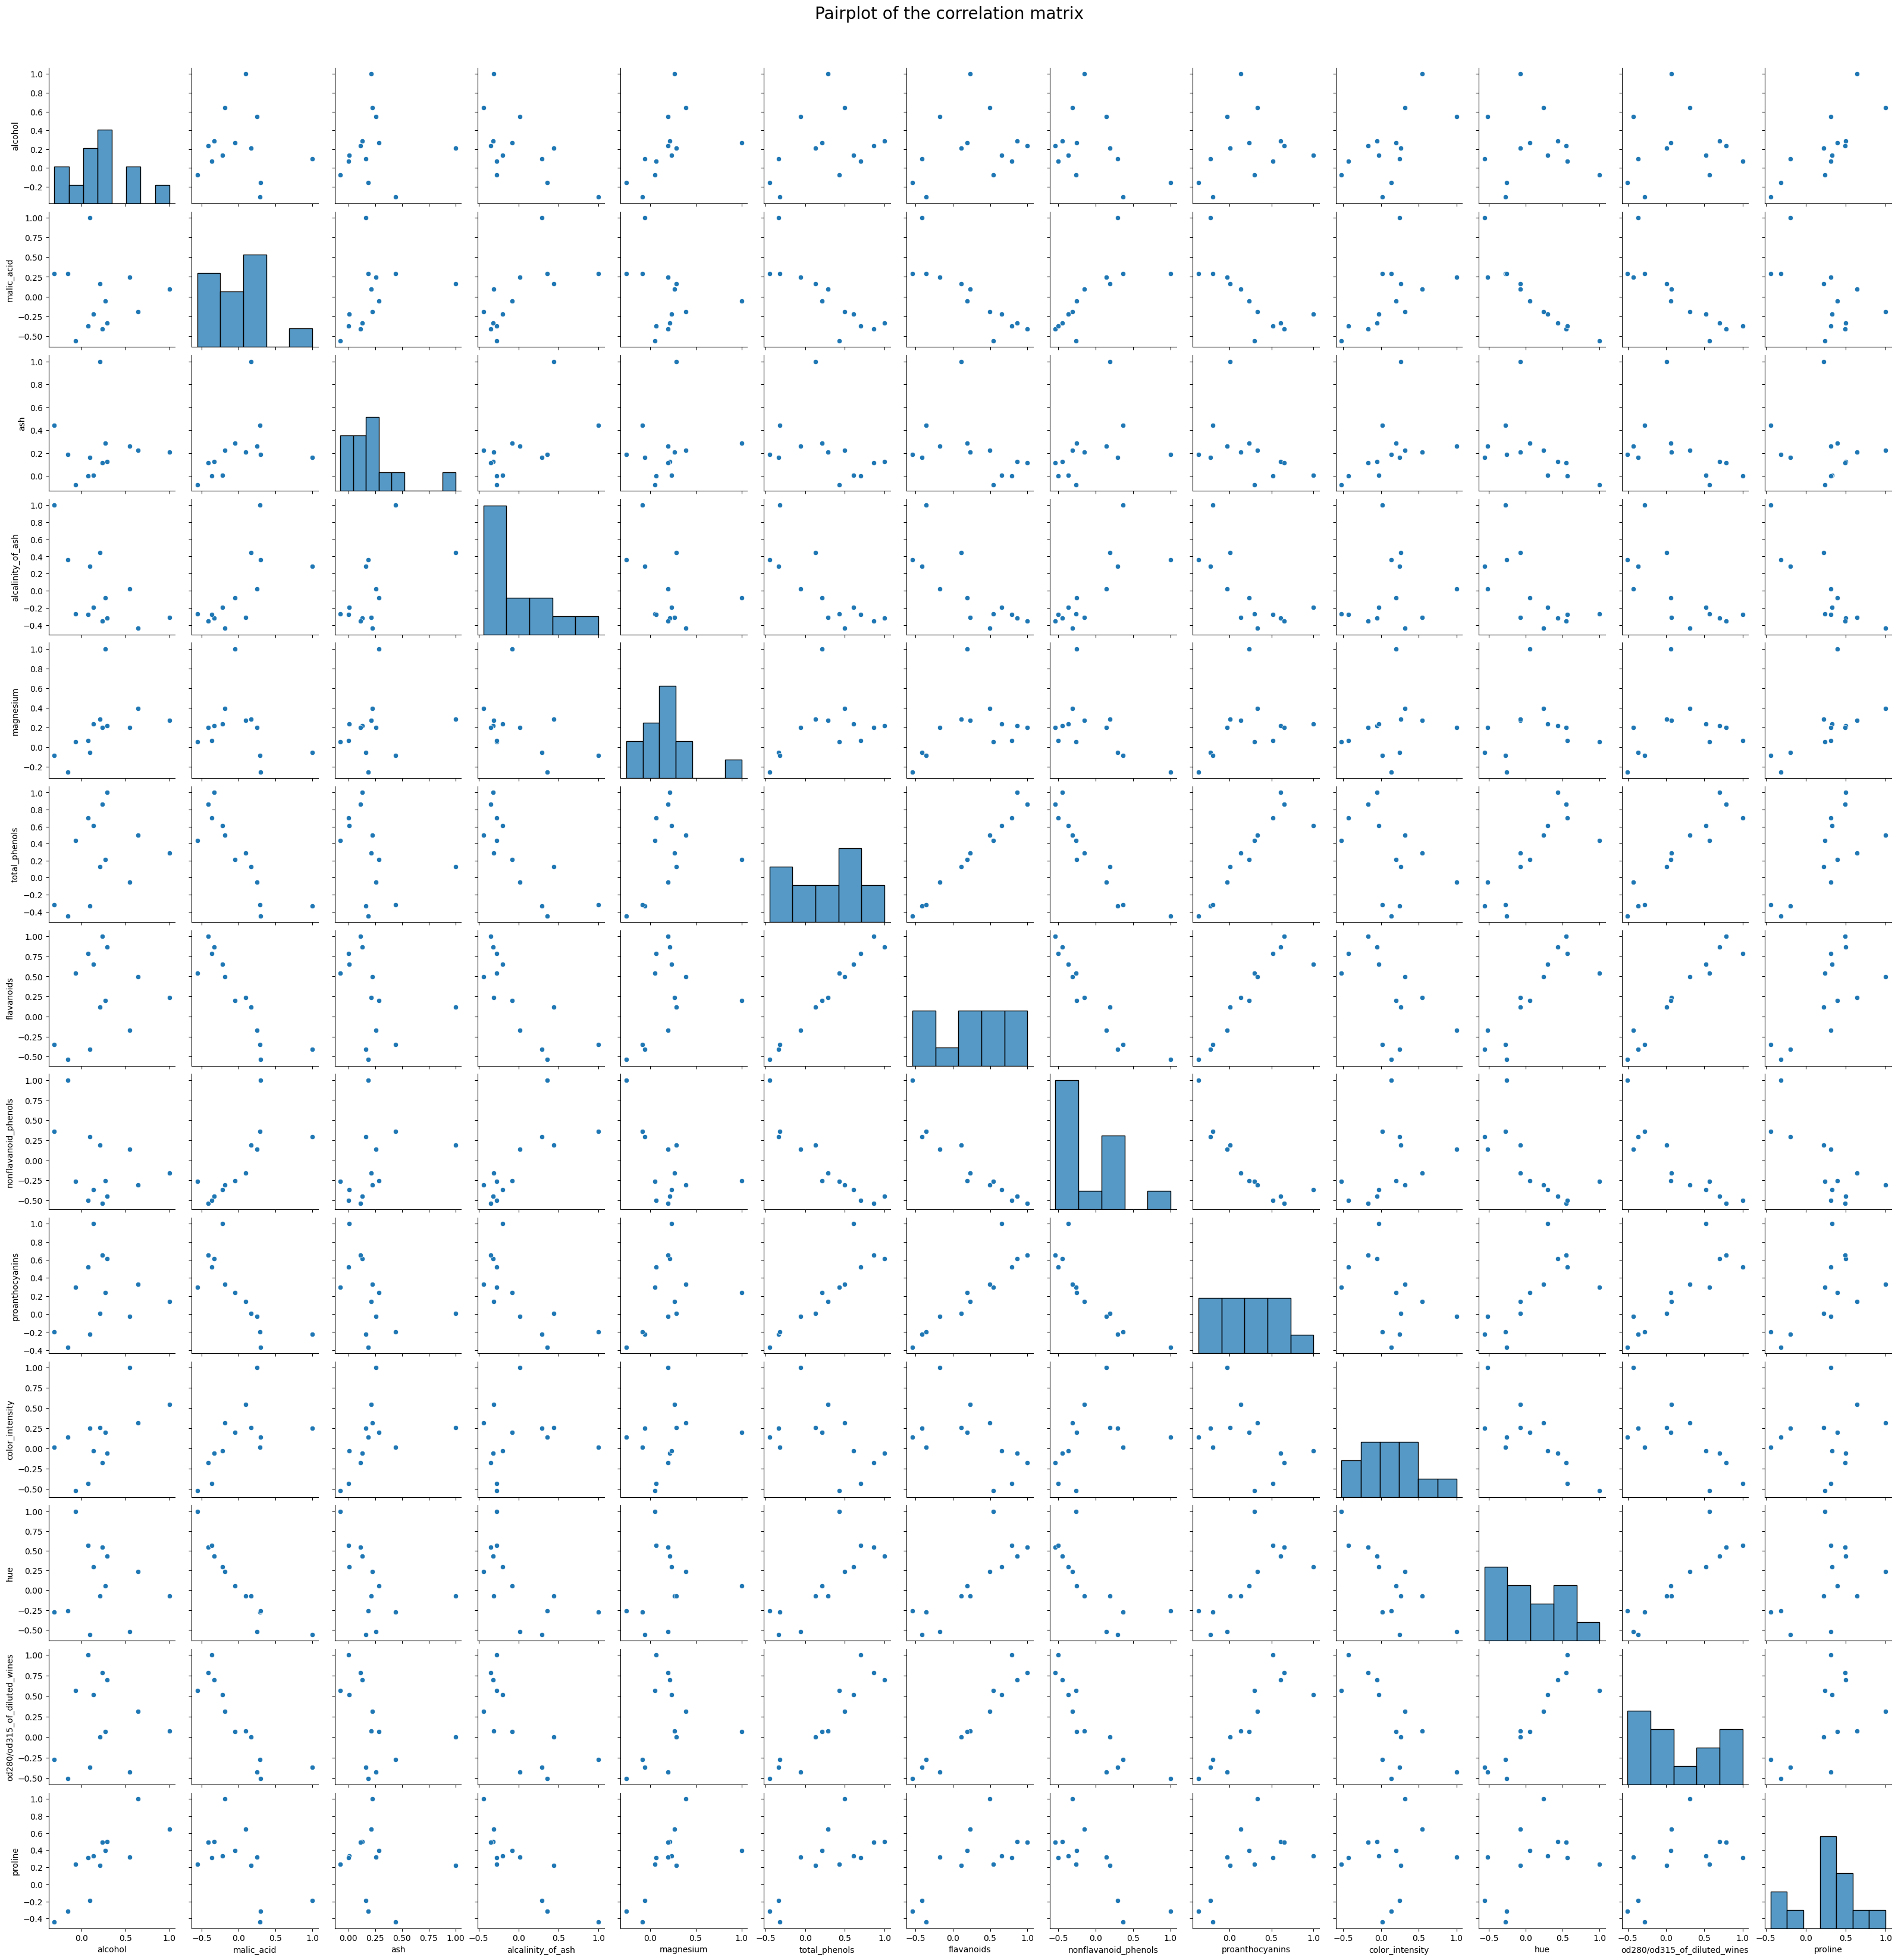

In [46]:
corr_matrix = calculate_corr_matrix(targetless_df)
plot_corr_matrix(corr_matrix)
# Additional plot operations
plt.suptitle("Pairplot of the correlation matrix", y=1.02, size=20)


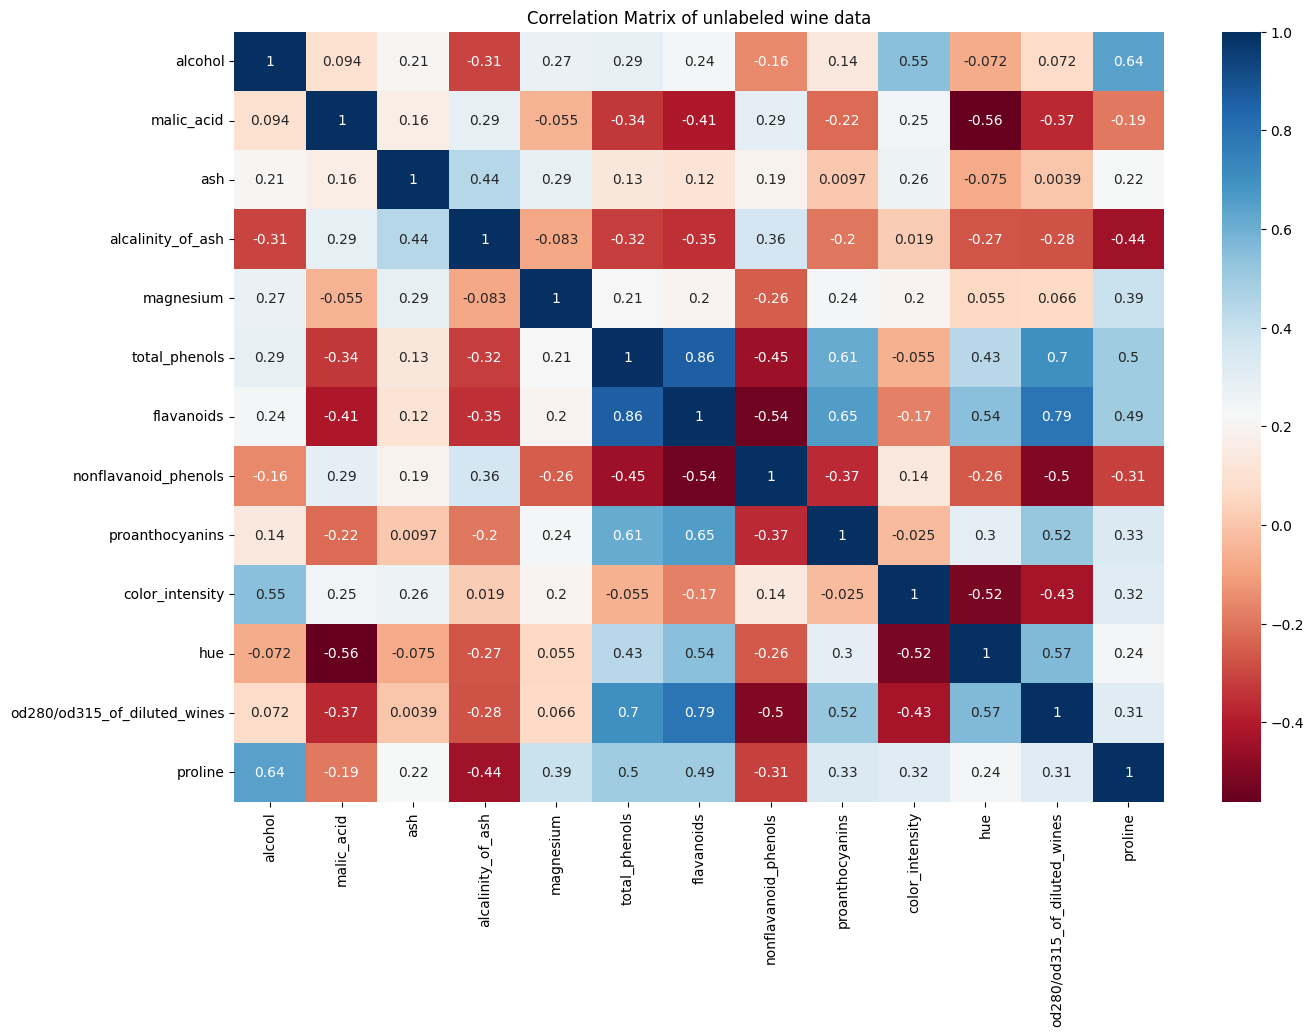

In [47]:
plot_corr_heatmap(corr_matrix, "Correlation Matrix of unlabeled wine data")

Text(0.5, 1.0, 'Correlation Matrix of scaled wine data')

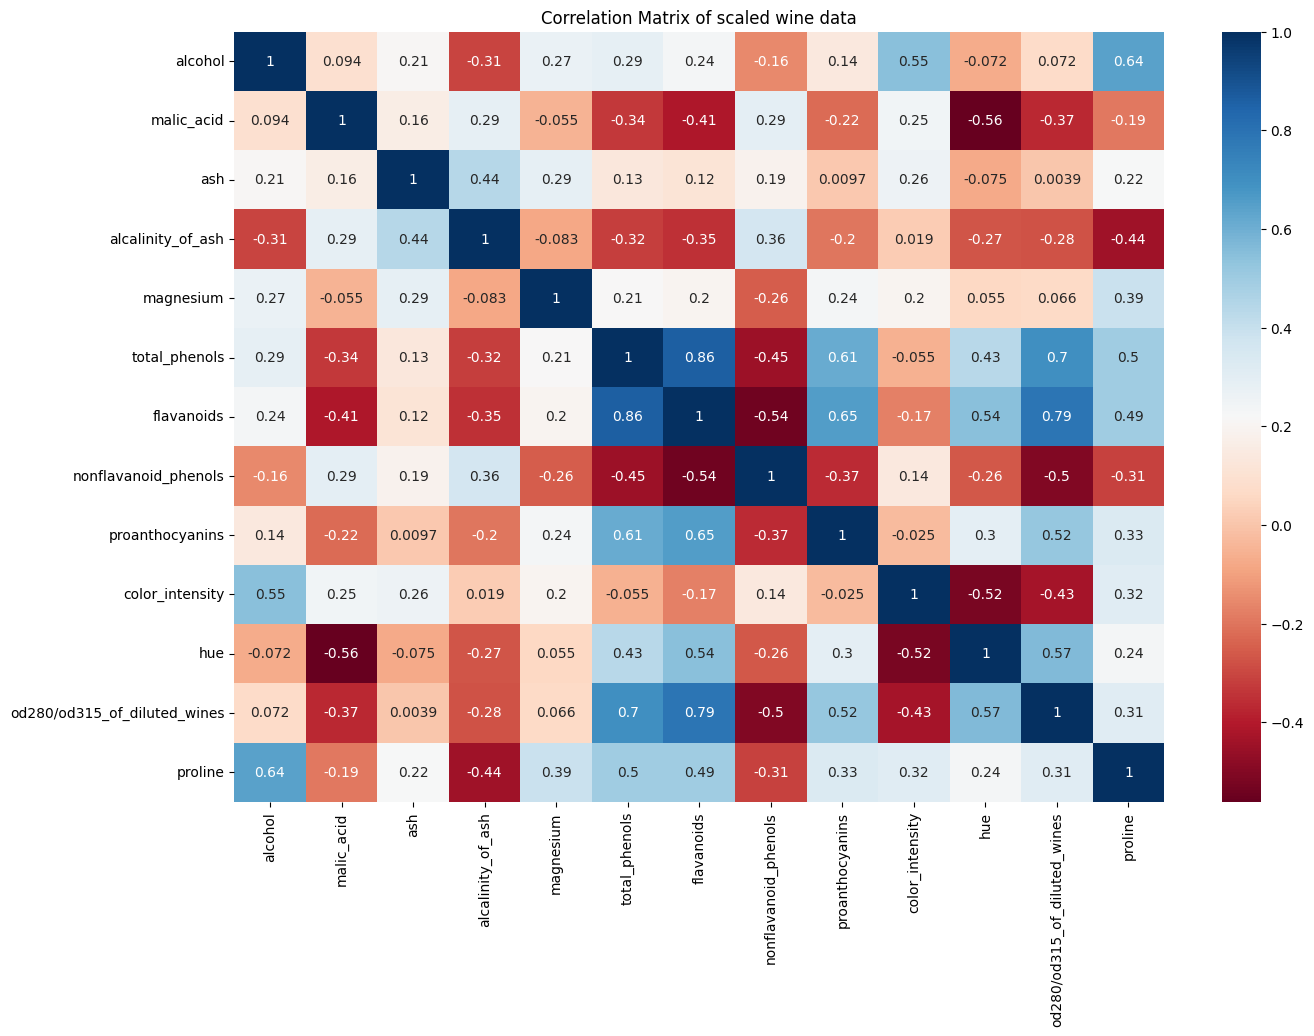

In [48]:
scale_corr_matrix = calculate_corr_matrix(scaled_data_frame)
plot_corr_heatmap(scale_corr_matrix)

# Additional plot operations
plt.title("Correlation Matrix of scaled wine data")

Correlation matrix for scaled and unsaled values gives the same results

# LABELED DATA

In [49]:
# set true labels in df to use them in plotting
label_df = df.copy()
label_df['target'] = y

In [50]:
label_df.head(10)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   
5        3.39                  0.34             1.97             6.75  1.05   
6        2.52                  0.30             1.98             5.25  1.02   
7        2.51                  0.31             1.25             5.05  1.06   
8        2.98                  0.29             1.98             5.20  1.08   
9        3.15                  0.22             1.85             7.22  1.01   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0  
5                          2.85   1450.0       0  
6                          3.58   1290.0       0  
7                          3.58   1295.0       0  
8                          2.85   1045.0       0  
9                          3.55   1045.0       0

In [51]:
label_df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

#### 1. Display all features in a single plot by using a parallel lines plot or a heatmap.

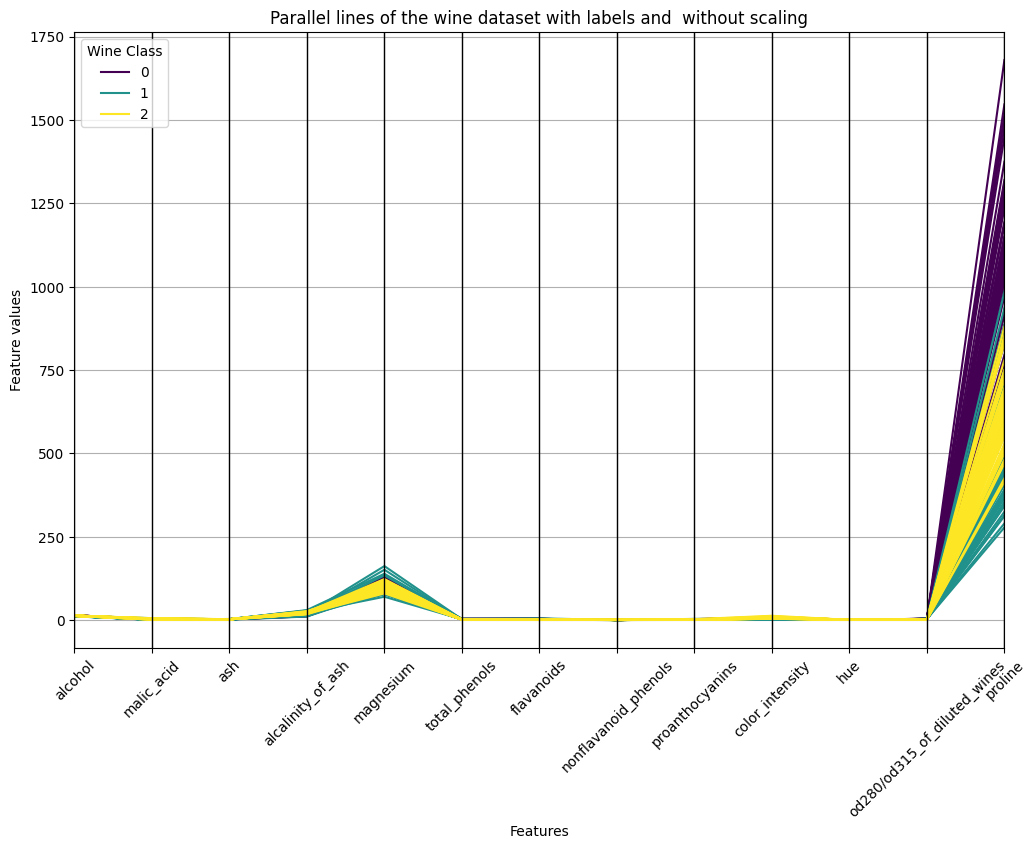

In [52]:
plot_parrallel_lines(label_df, iflabel=True, legend="Wine Class", title="Parallel lines of the wine dataset with labels and  without scaling")


### With scaled values

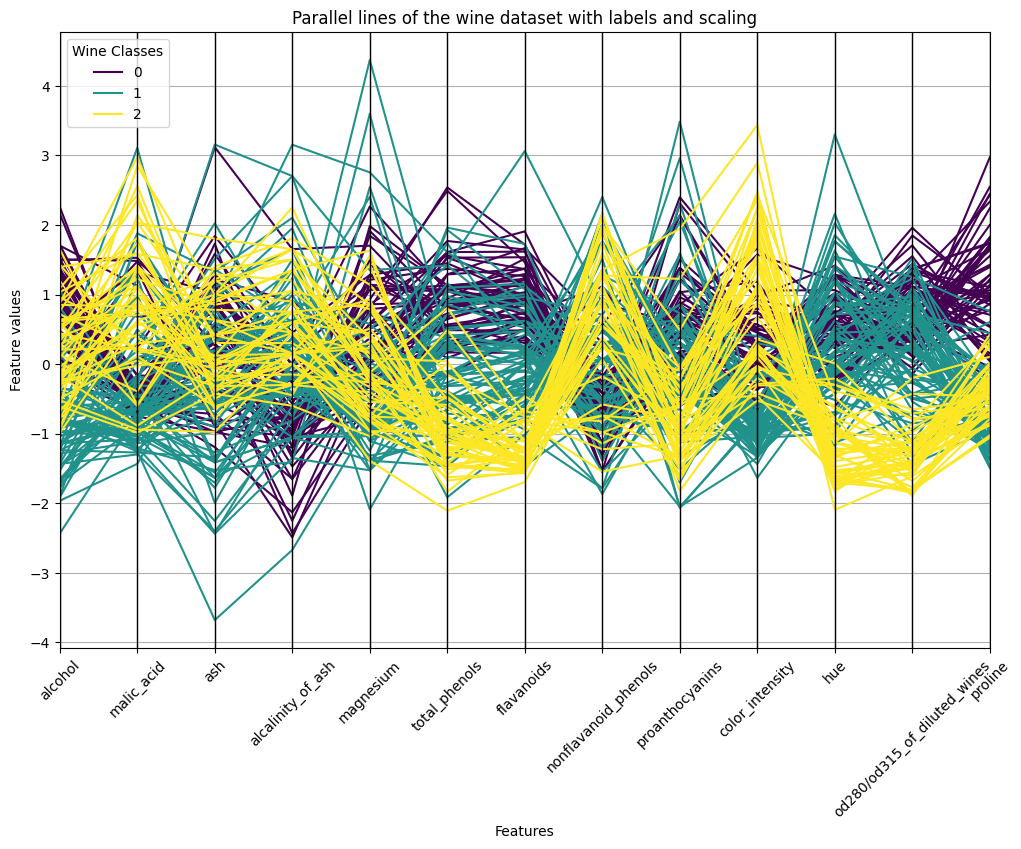

In [53]:
label_df_copy = label_df.copy()
scaled_label_df = scale_dataset_z_score(label_df_copy)
plot_parrallel_lines(scaled_label_df, iflabel=True, legend="Wine Classes", title="Parallel lines of the wine dataset with labels and scaling")

### 3. Detect any outliers in the features’ distribution through means of a boxplot.

In [54]:
# for generating groupd box plot
def generate_grouped_box_plot(data_frame, target_column,  title):

    # reshape the DataFrame from wide to long format
    df_reshaped = data_frame.melt(id_vars=target_column, var_name='features', value_name='values')

    plt.figure(figsize=(15, 8))
    sns.boxplot(x='features', y='values', hue=target_column, data=df_reshaped, palette='Set1')
    plt.xticks(rotation=45)
    plt.xlabel('Features')
    plt.ylabel('Feature values')
    plt.legend(loc="upper left", title=title)
    plt.tight_layout()

Text(0.5, 1.0, 'Grouped Boxplot of the wine dataset, with labels and without scaling')

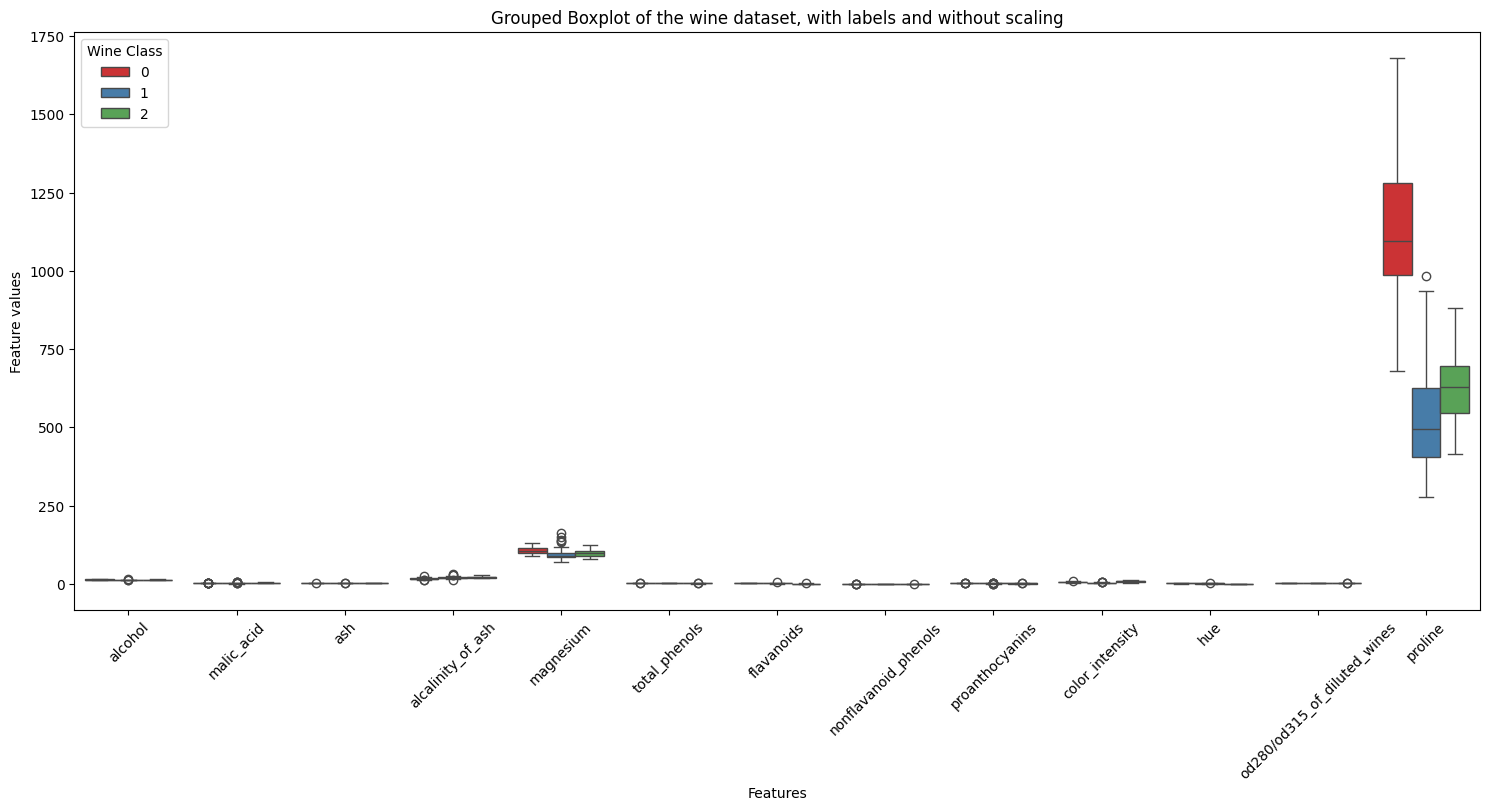

In [55]:
generate_grouped_box_plot(label_df, 'target', title="Wine Class")
# Additional plot operations
plt.title("Grouped Boxplot of the wine dataset, with labels and without scaling")

Without scaled values it is hard to read anything from the plot, so we need to rescale values

Text(0.5, 1.02, 'Grouped Boxplot of Wine Features by Class (scaled)')

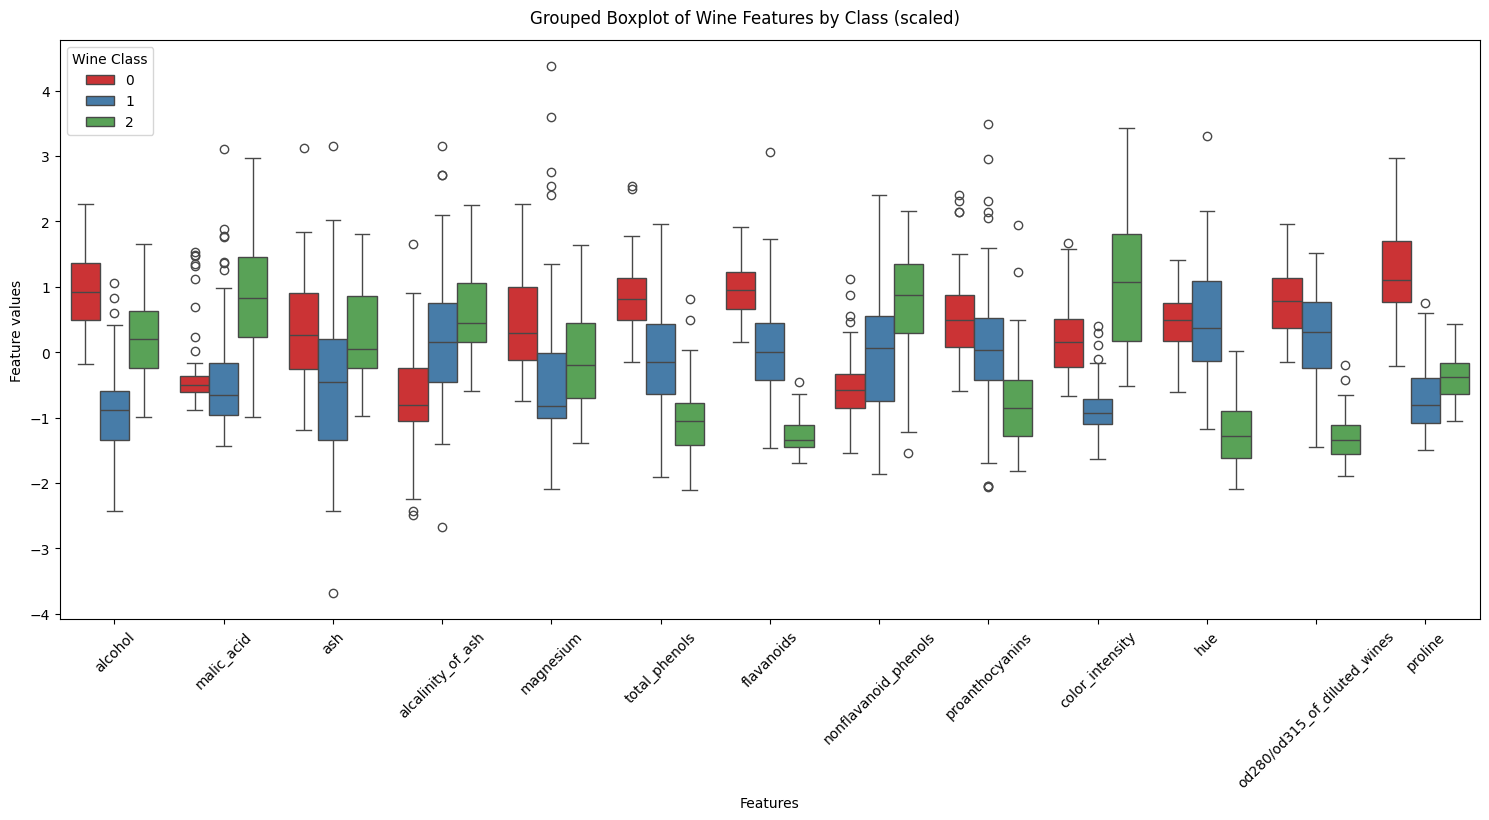

In [56]:
scaled_label_df['target'] = y
generate_grouped_box_plot(scaled_label_df, target_column='target', title='Wine Class')

# Additional plot operations
plt.suptitle('Grouped Boxplot of Wine Features by Class (scaled)', y=1.02)

A grouped box plot with scled values  allows us to clearly visualize the distribution of multiple features across different groups, making it easy to identify variations and detect outliers within each feature.

For example we can see outliers in : 
- malic_acid
- magnesium
- pranthocyanins
- nonflavanoiud_phenols

### 4. Find out which data points have outliers in any feature

In [57]:
# for splitting data into each groupd
def split_data(data_frame, label):
    label_df = data_frame.copy()
    return label_df[label_df['target'] == label]

group_0 = split_data(label_df, 0)
group_1 = split_data(label_df, 1)
group_2 = split_data(label_df, 2)

outliers_group_0 = detect_outliers_iqr(group_0)
outliers_group_1 = detect_outliers_iqr(group_1)
outliers_group_2 = detect_outliers_iqr(group_2)

outliers_group_0_rows = group_0[outliers_group_0.any(axis=1)]
outliers_group_1_rows = group_1[outliers_group_1.any(axis=1)]
outliers_group_2_rows = group_2[outliers_group_2.any(axis=1)]

In [58]:
print(f"Number of outliers in group 0: {outliers_group_0.sum().sum()}")
print(outliers_group_0_rows)

Number of outliers in group 0: 24
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
1     13.20        1.78  2.14               11.2      100.0           2.65   
2     13.16        2.36  2.67               18.6      101.0           2.80   
3     14.37        1.95  2.50               16.8      113.0           3.85   
4     13.24        2.59  2.87               21.0      118.0           2.80   
13    14.75        1.73  2.39               11.4       91.0           3.10   
14    14.38        1.87  2.38               12.0      102.0           3.30   
19    13.64        3.10  2.56               15.2      116.0           2.70   
21    12.93        3.80  2.65               18.6      102.0           2.41   
25    13.05        2.05  3.22               25.0      124.0           2.63   
32    13.68        1.83  2.36               17.2      104.0           2.42   
33    13.76        1.53  2.70               19.5      132.0           2.95   
39    14.22        3.99  2.51 

In [59]:
print(f"Number of outliers in group 1: {outliers_group_1.sum().sum()}")
print(outliers_group_1_rows)

Number of outliers in group 1: 36
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
59     12.37        0.94  1.36               10.6       88.0           1.98   
60     12.33        1.10  2.28               16.0      101.0           2.05   
61     12.64        1.36  2.02               16.8      100.0           2.02   
62     13.67        1.25  1.92               18.0       94.0           2.10   
66     13.11        1.01  1.70               15.0       78.0           2.98   
68     13.34        0.94  2.36               17.0      110.0           2.53   
69     12.21        1.19  1.75               16.8      151.0           1.85   
71     13.86        1.51  2.67               25.0       86.0           2.95   
72     13.49        1.66  2.24               24.0       87.0           1.88   
73     12.99        1.67  2.60               30.0      139.0           3.30   
78     12.33        0.99  1.95               14.8      136.0           1.90   
79     12.70      

In [60]:
print(f"Number of outliers in group 2: {outliers_group_2.sum().sum()}")
print(outliers_group_2_rows)

Number of outliers in group 2: 8
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
133    12.70        3.55  2.36               21.5      106.0           1.70   
140    12.93        2.81  2.70               21.0       96.0           1.54   
141    13.36        2.56  2.35               20.0       89.0           1.40   
150    13.50        3.12  2.62               24.0      123.0           1.40   
158    14.34        1.68  2.70               25.0       98.0           2.80   
159    13.48        1.67  2.64               22.5       89.0           2.60   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
133        1.20                  0.17             0.84             5.00  0.78   
140        0.50                  0.53             0.75             4.60  0.77   
141        0.50                  0.37             0.64             5.60  0.70   
150        1.57                  0.22             1.25             8.60  0.59   
158     

### 5. Detect correlations between features (e.g. by plotting a scatter matrix, computing correlation values, . . . )

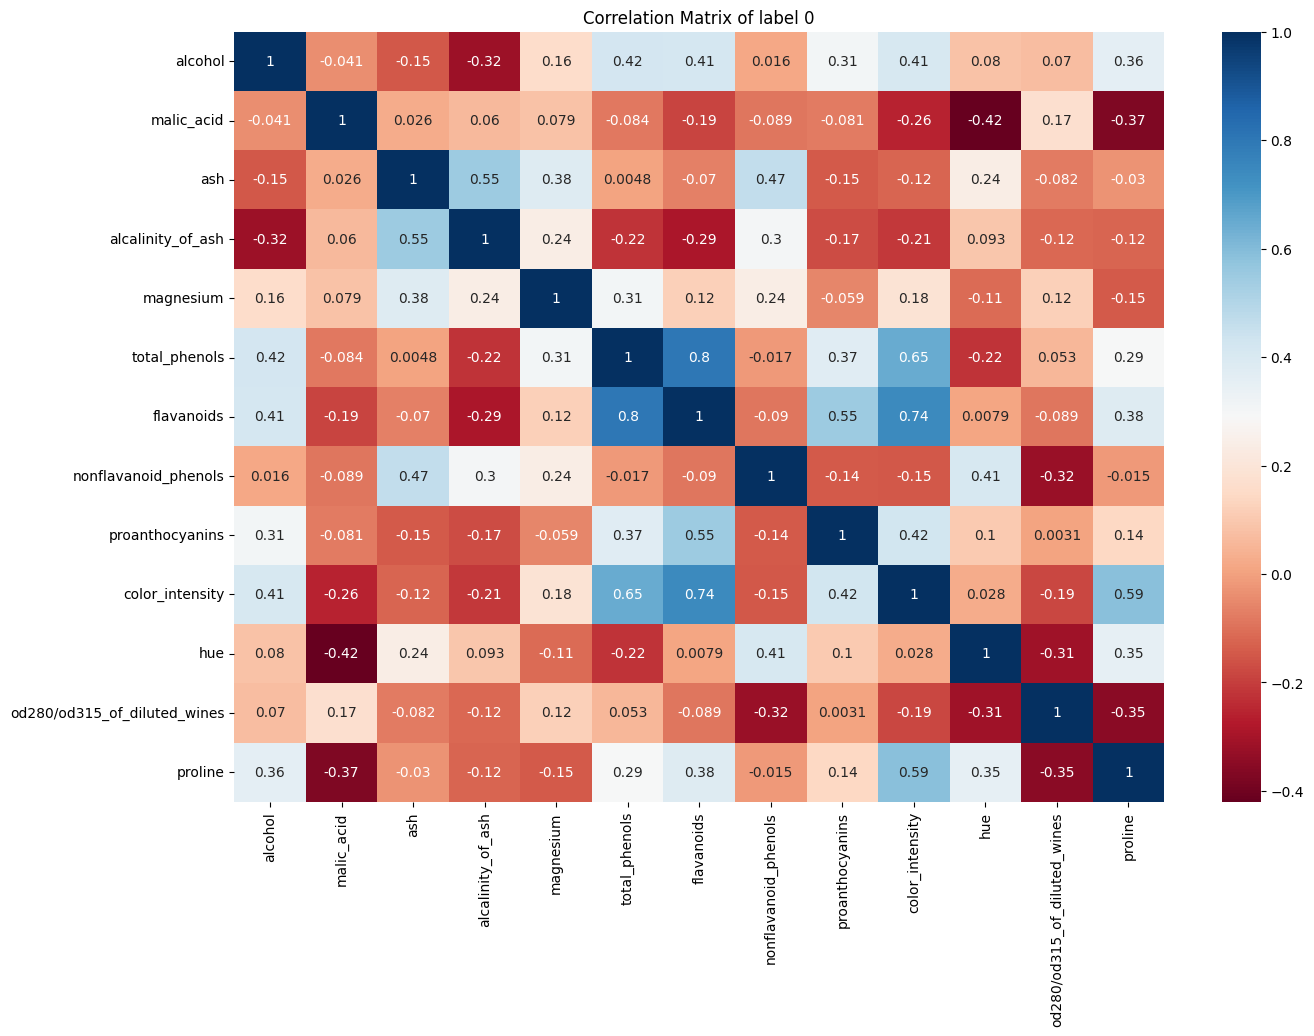

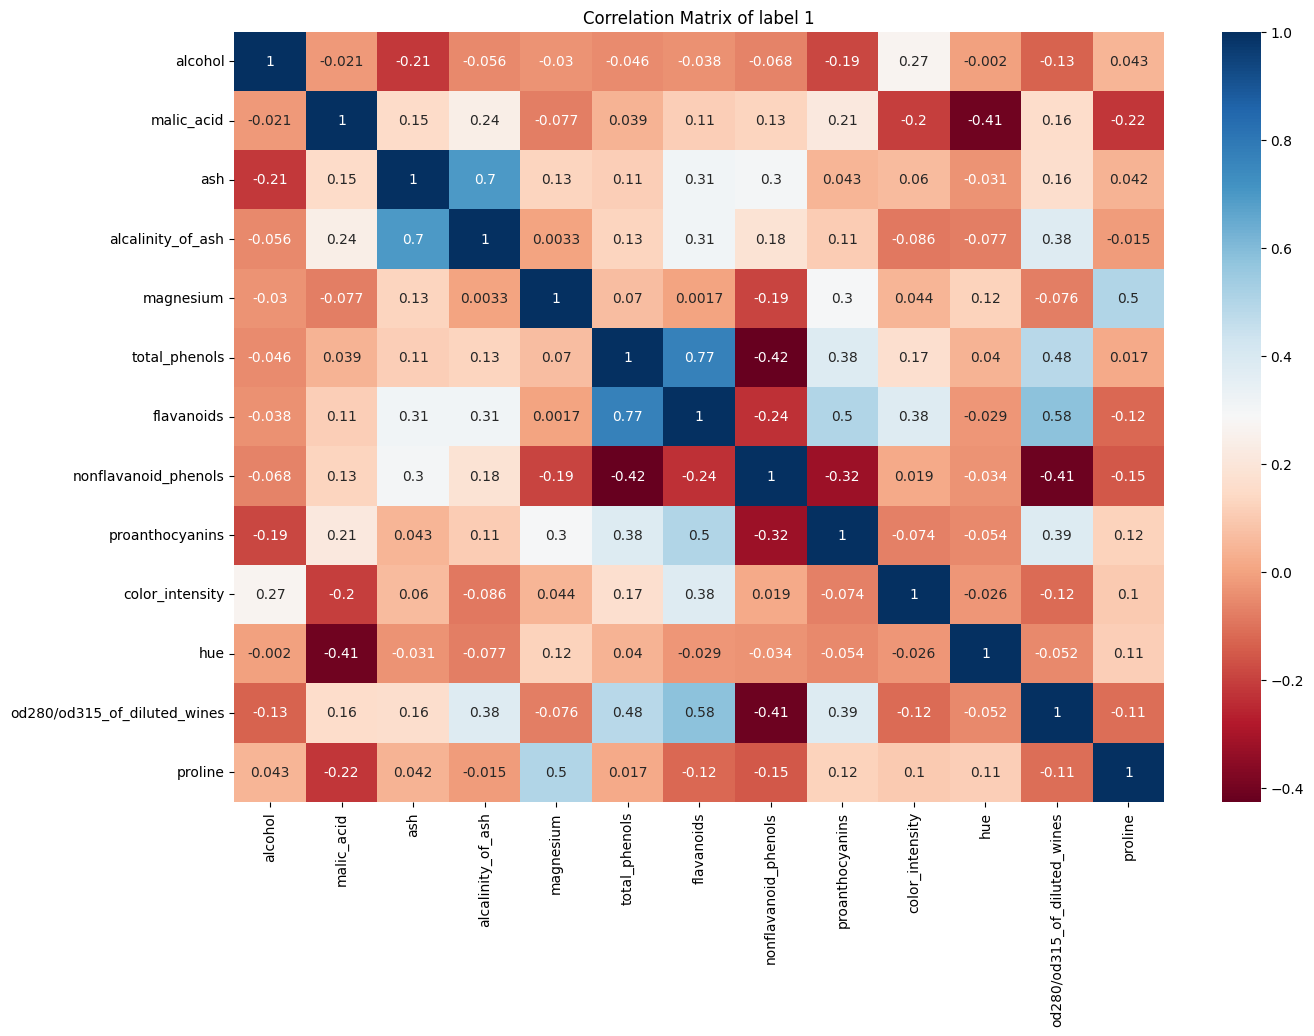

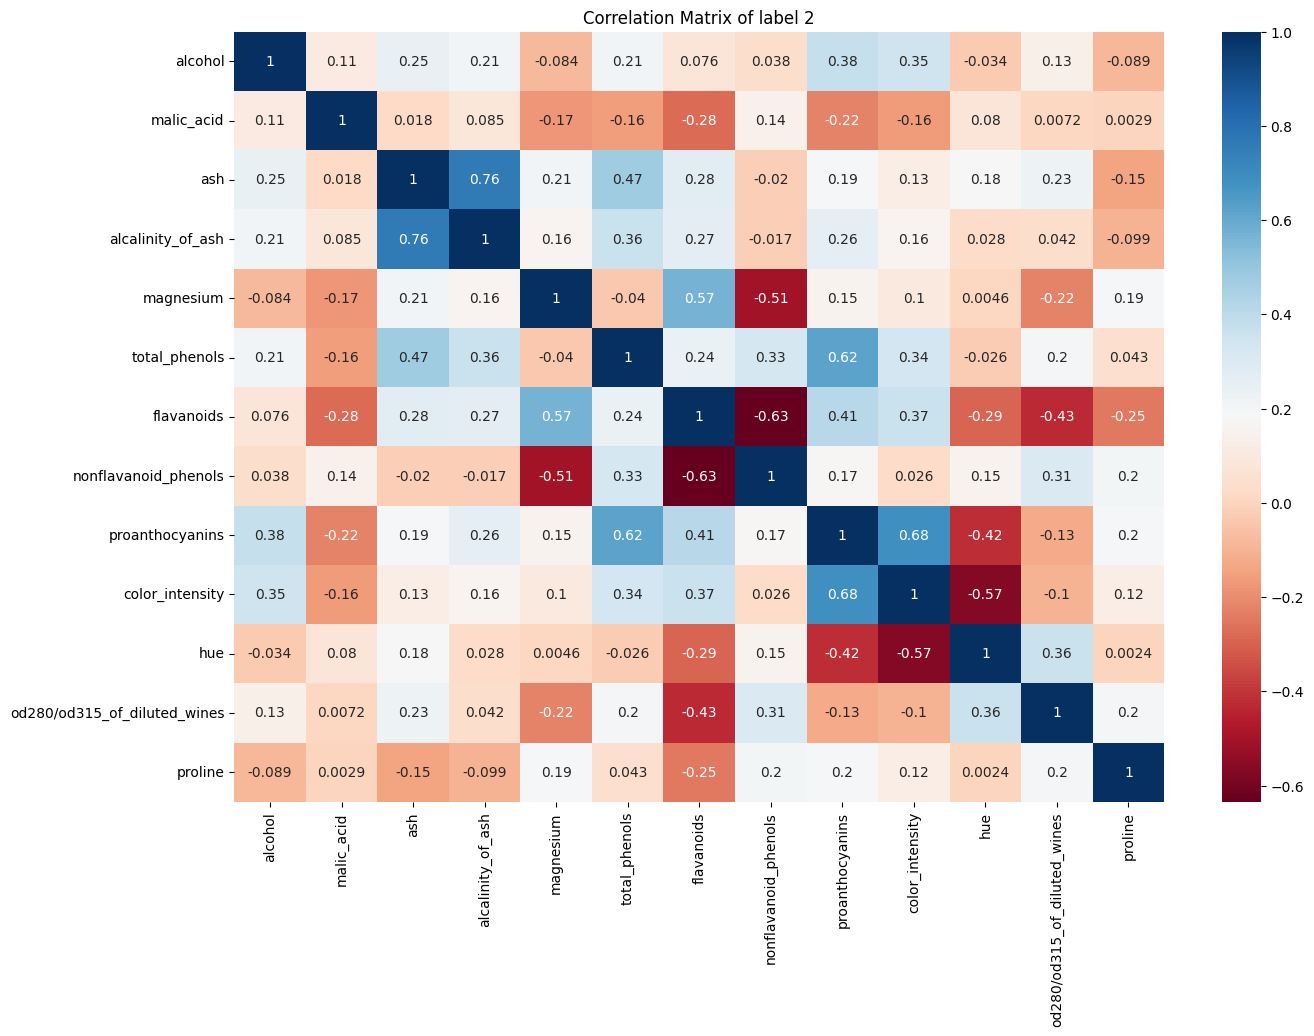

In [61]:
label_a = split_data(label_df, 0)
label_b = split_data(label_df, 1)
label_c = split_data(label_df, 2)

labels = [label_a, label_b, label_c]
names = ['0', '1', '2']

for index, label in enumerate(labels):
    label.drop(columns='target', inplace=True)
    label_corr_matrix = calculate_corr_matrix(label)
    plot_corr_heatmap(label_corr_matrix, f"Correlation Matrix of label {names[index]}")
    plt.size = (10, 10)


# __________________________________________________________________________________

# HOMEWORK

## Unlabeled data

In [62]:
from sklearn.datasets import load_iris

x_data, y_labels = load_iris(as_frame=True, return_X_y=True)

irises_df = x_data.copy()

In [63]:
irises_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

### 1. Display all features in a single plot by using a parallel lines plot or a heatmap.

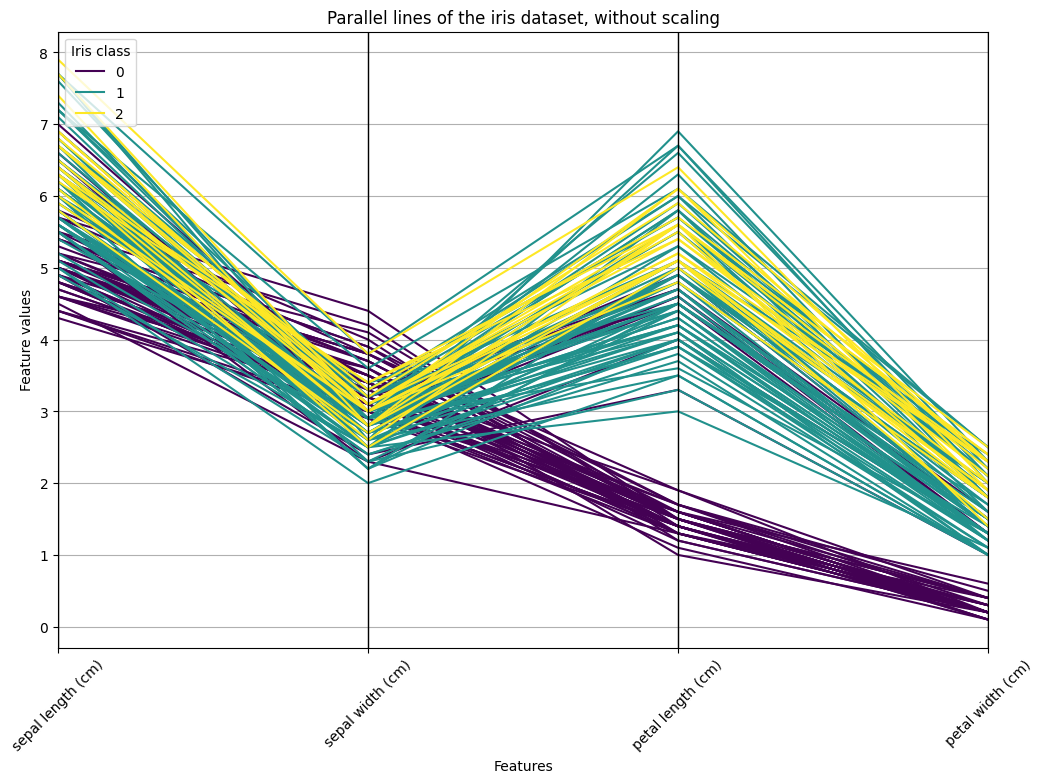

In [64]:
plot_parrallel_lines(irises_df, legend="Iris class", title="Parallel lines of the iris dataset, without scaling", iflabel=True)

Text(50.722222222222214, 0.5, 'Sample number')

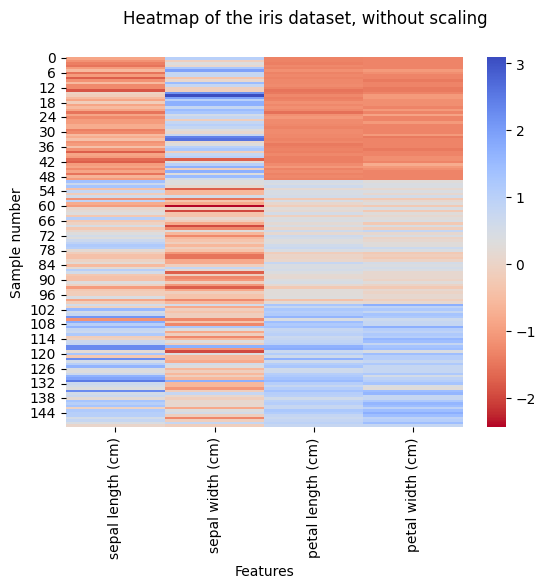

In [65]:
plot_heatmap(irises_df)
# Additional plot operations
plt.suptitle("Heatmap of the iris dataset, without scaling")
plt.xlabel('Features')
plt.ylabel('Sample number')

### 2. Decide whether the data needs scaling

The feature values are in similiar rangees so we don't need to use scaling for this dataset

Text(0, 0.5, 'Feature values')

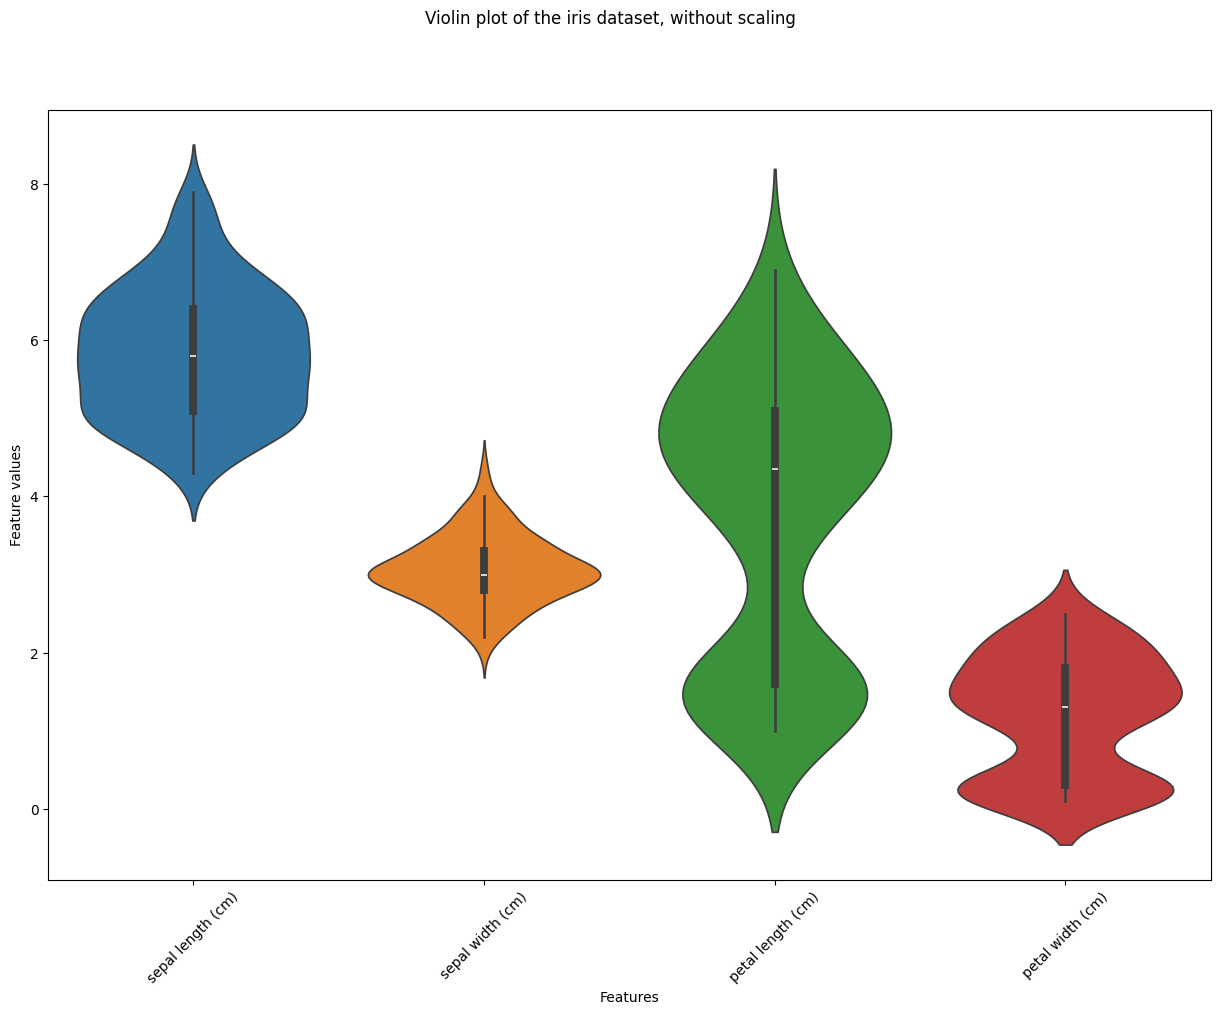

In [66]:
plot_violin_plot(irises_df)
# Additional plot operations
plt.suptitle("Violin plot of the iris dataset, without scaling")
plt.xlabel('Features')
plt.ylabel('Feature values')

Text(0, 0.5, 'Feature values')

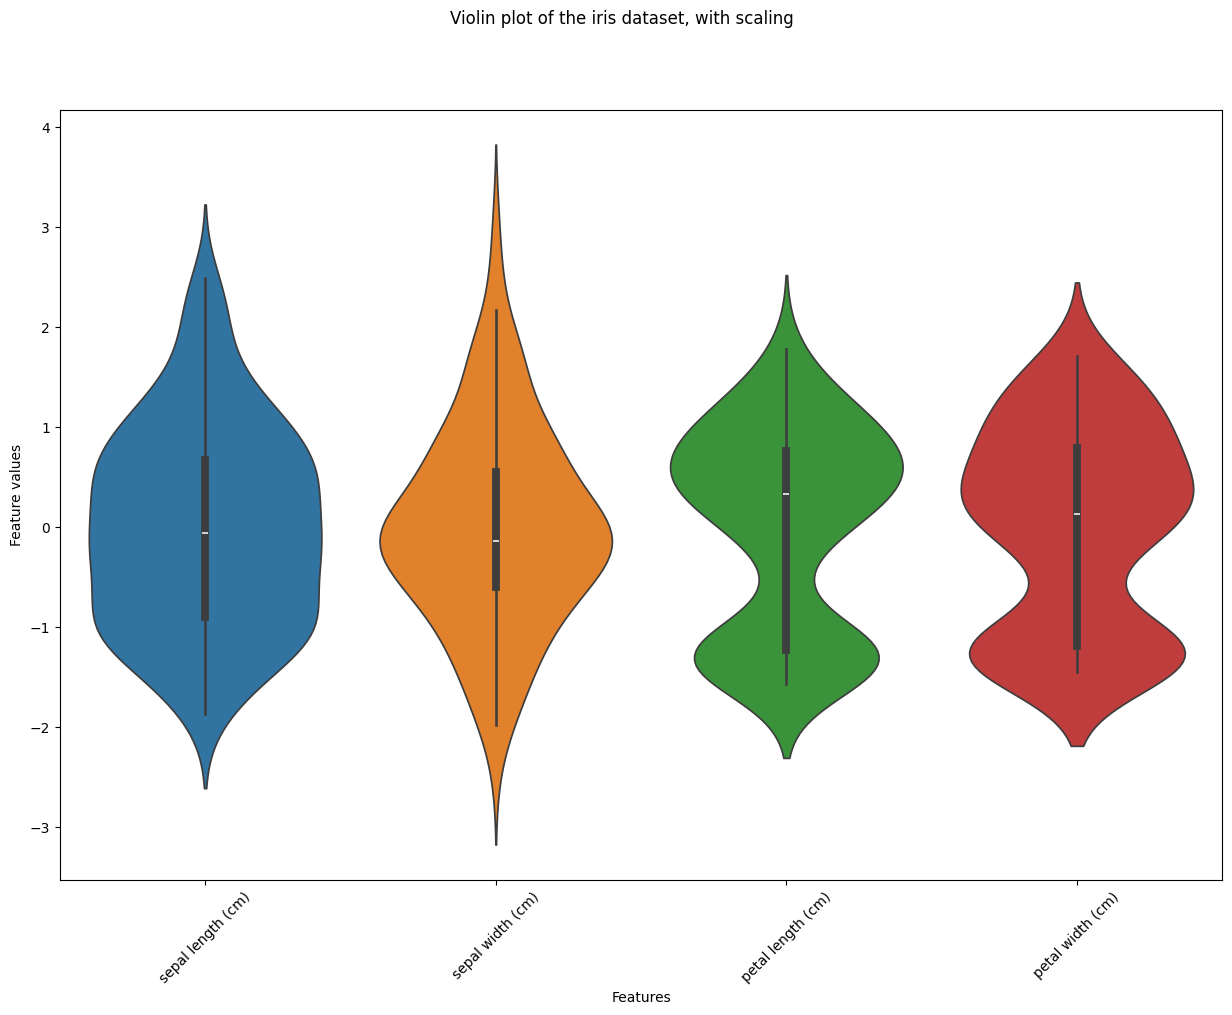

In [67]:
scale_irises_df = scale_dataset_z_score(irises_df)
plot_violin_plot(scale_irises_df)
# Additional plot operations
plt.suptitle("Violin plot of the iris dataset, with scaling")
plt.xlabel('Features')
plt.ylabel('Feature values')

After scaling and displaying dataset in violin plot, i would rather work with unscaled values, so it's better represent real length of leaves

### 3. Detect any outliers in the features’ distribution through means of a boxplot

Text(0, 0.5, 'Feature values')

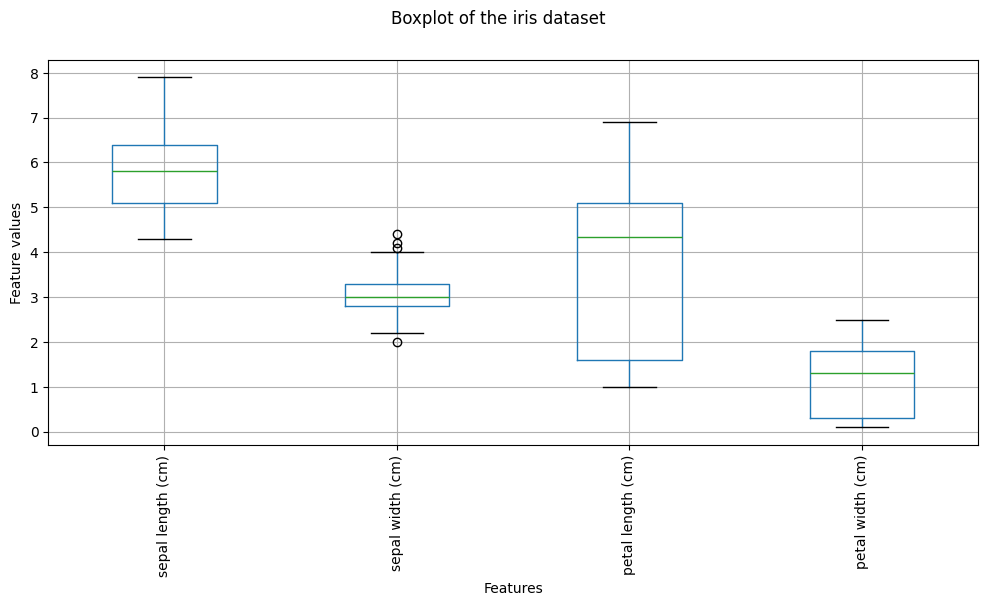

In [68]:
generate_box_plot(irises_df)
# Additional plot operations
plt.suptitle("Boxplot of the iris dataset")
plt.xlabel('Features')
plt.ylabel('Feature values')

We can see outliers only in sepal_width category

### 4. Find out which data points have outliers in any feature.

In [69]:
outliers = detect_outliers_iqr(irises_df)


outliers_df = outliers.any(axis=1)  # this will tell which rows have outliers in any feature


outlier_rows = irises_df[outliers_df]
print(f"Number of outliers: {outliers.sum().sum()}")
print(outlier_rows)

Number of outliers: 4
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
15                5.7               4.4                1.5               0.4
32                5.2               4.1                1.5               0.1
33                5.5               4.2                1.4               0.2
60                5.0               2.0                3.5               1.0


### 5. Detect correlations between features (e.g. by plotting a scatter matrix, computing correlation values, . . . )

Text(0.5, 1.0, 'Correlation Matrix of the iris dataset')

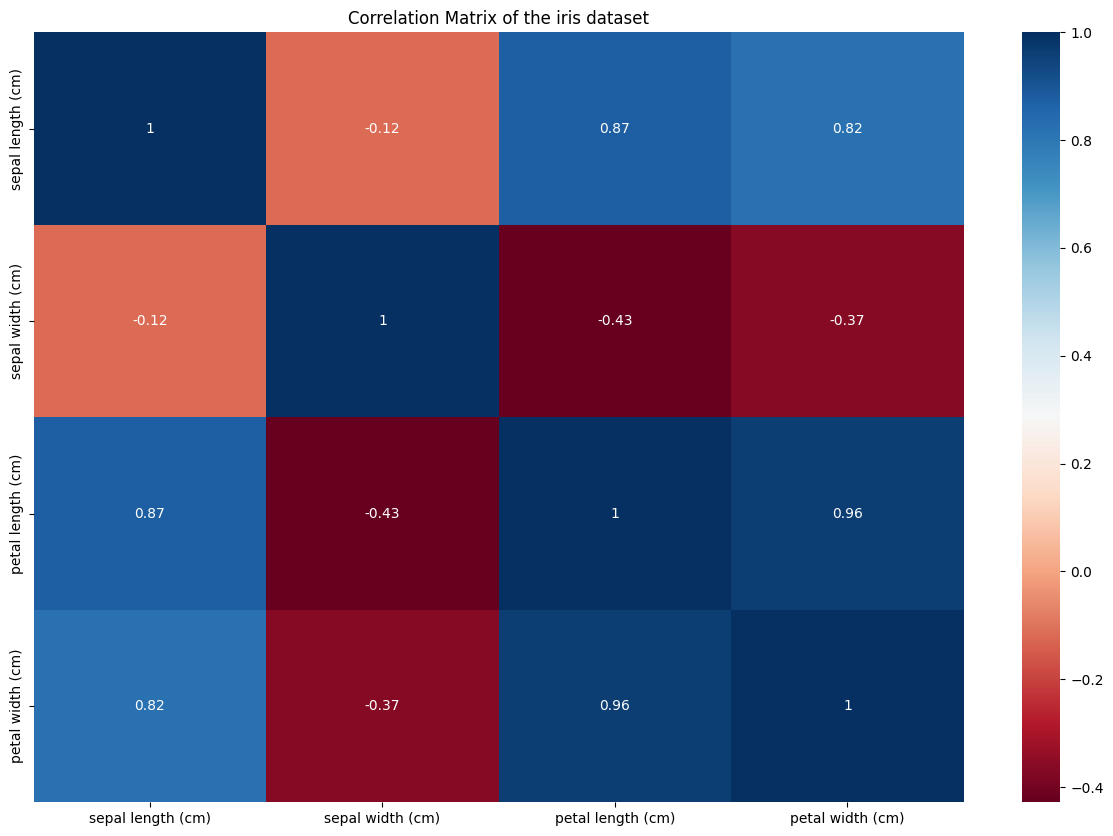

In [70]:
iris_corr_matrix = calculate_corr_matrix(irises_df)
plot_corr_heatmap(iris_corr_matrix)
# Additional plot operations
plt.title("Correlation Matrix of the iris dataset")


Text(0.5, 0.9, 'Scatter matrix of the iris dataset')

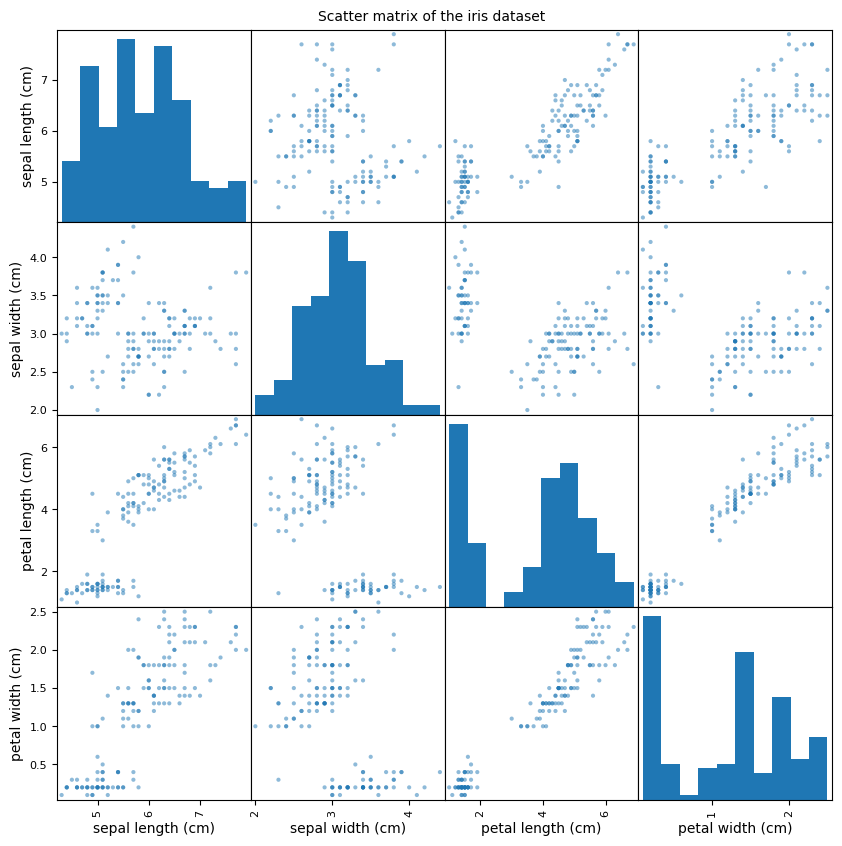

In [71]:
scatter_matrix(irises_df, figsize=(10,10))
# Additional plot operations
plt.suptitle("Scatter matrix of the iris dataset", y=0.9, size=10)

## Labeled Data

### 1. Display all features in a single plot by using a parallel lines plot or a heatmap.

In [72]:
irises_df_label = x_data.copy()
irises_df_label['label'] = y_labels
irises_df_label.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label  
0      0  
1      0  
2      0  
3      0  
4      0

Text(0.5, 1.0, 'Parallel lines of the iris dataset, with labels')

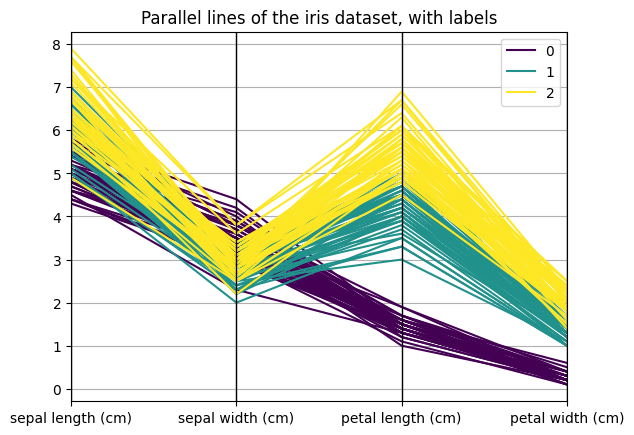

In [73]:
parallel_coordinates(irises_df_label,class_column='label', colormap='viridis')
# Additional plot operations
plt.title("Parallel lines of the iris dataset, with labels")

### 2. Decide whether the data needs scaling

It the same as in unlabeled data, I don't think we need to scale the values, cause the ranges are similiar

### 3. Detect any outliers in the features’ distribution through means of a boxplot

Text(0.5, 1.0, 'Grouped Boxplot of the iris dataset')

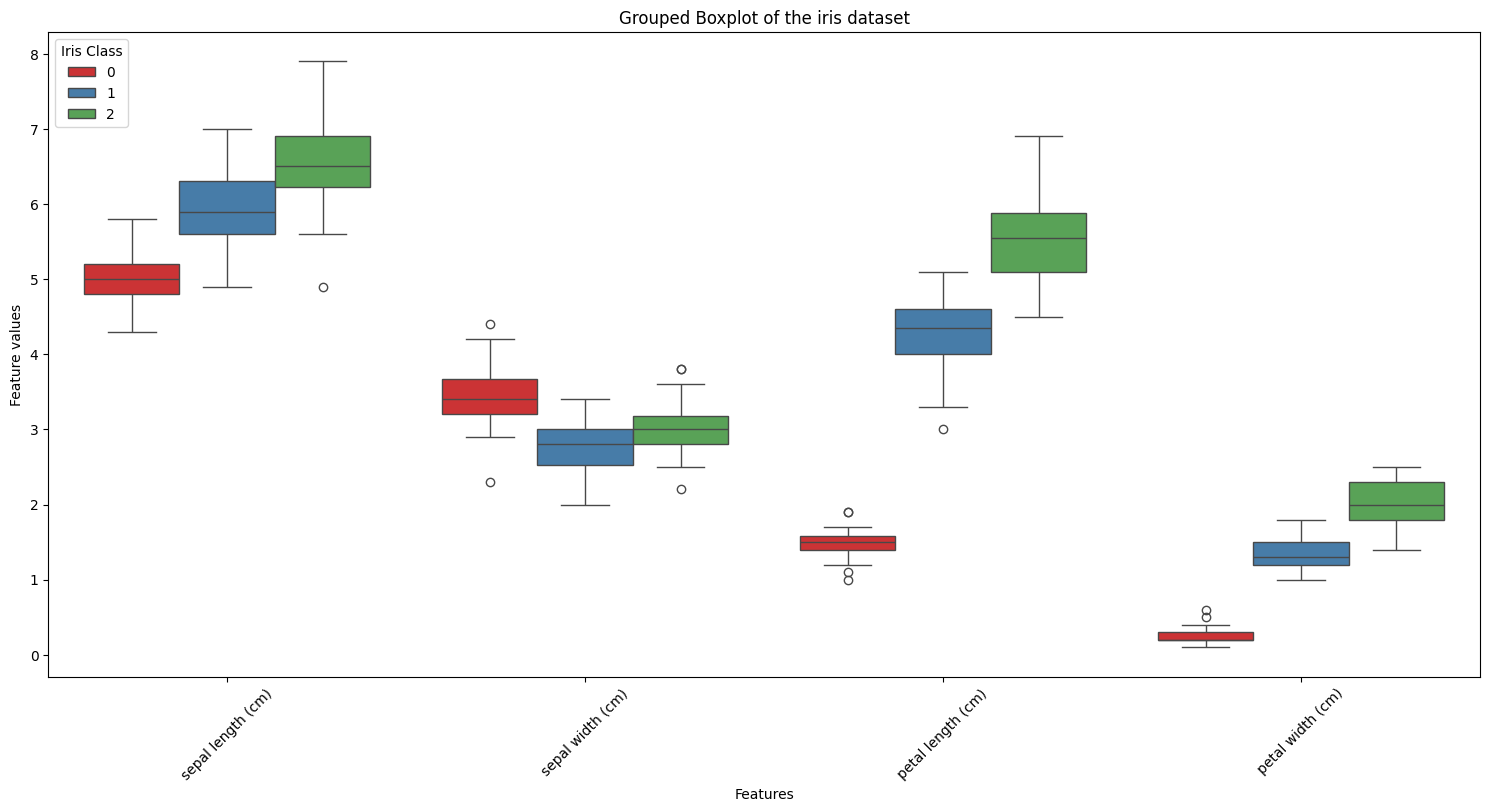

In [74]:
group_column = 'label'
generate_grouped_box_plot(irises_df_label, group_column, title="Iris Class")
# Additional plot operations
plt.title("Grouped Boxplot of the iris dataset")


### 4. Find out which data points have outliers in any feature

In [75]:

# for splitting data into each groupd
def split_data_iris_set(data_frame, label):
    label_df = data_frame.copy()
    return label_df[label_df['label'] == label]


group_a = split_data_iris_set(irises_df_label, 0)
group_b = split_data_iris_set(irises_df_label, 1)
group_c = split_data_iris_set(irises_df_label, 2)

outliers_group_a = group_a.drop(columns='label').apply(detect_outliers_iqr)
outliers_group_b = group_b.drop(columns='label').apply(detect_outliers_iqr)
outliers_group_c = group_c.drop(columns='label').apply(detect_outliers_iqr)

outliers_group_a_rows = group_a[outliers_group_a.any(axis=1)]
outliers_group_b_rows = group_b[outliers_group_b.any(axis=1)]
outliers_group_c_rows = group_c[outliers_group_c.any(axis=1)]




In [76]:
print(f"Number of outliers in group A: {outliers_group_a.sum().sum()}")
print(outliers_group_a_rows)

Number of outliers in group A: 8
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
13                4.3               3.0                1.1               0.1   
15                5.7               4.4                1.5               0.4   
22                4.6               3.6                1.0               0.2   
23                5.1               3.3                1.7               0.5   
24                4.8               3.4                1.9               0.2   
41                4.5               2.3                1.3               0.3   
43                5.0               3.5                1.6               0.6   
44                5.1               3.8                1.9               0.4   

    label  
13      0  
15      0  
22      0  
23      0  
24      0  
41      0  
43      0  
44      0  


In [77]:
print(f"Number of outliers in group B: {outliers_group_b.sum().sum()}")
print(outliers_group_b_rows)

Number of outliers in group B: 1
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
98                5.1               2.5                3.0               1.1   

    label  
98      1  


In [78]:
print(f"Number of outliers in group C: {outliers_group_c.sum().sum()}")
print(outliers_group_c_rows)

Number of outliers in group C: 4
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
106                4.9               2.5                4.5               1.7   
117                7.7               3.8                6.7               2.2   
119                6.0               2.2                5.0               1.5   
131                7.9               3.8                6.4               2.0   

     label  
106      2  
117      2  
119      2  
131      2  


### 5. Detect correlations between features (e.g. by plotting a scatter matrix, computing correlation values, . . . )

<Figure size 3200x1800 with 0 Axes>

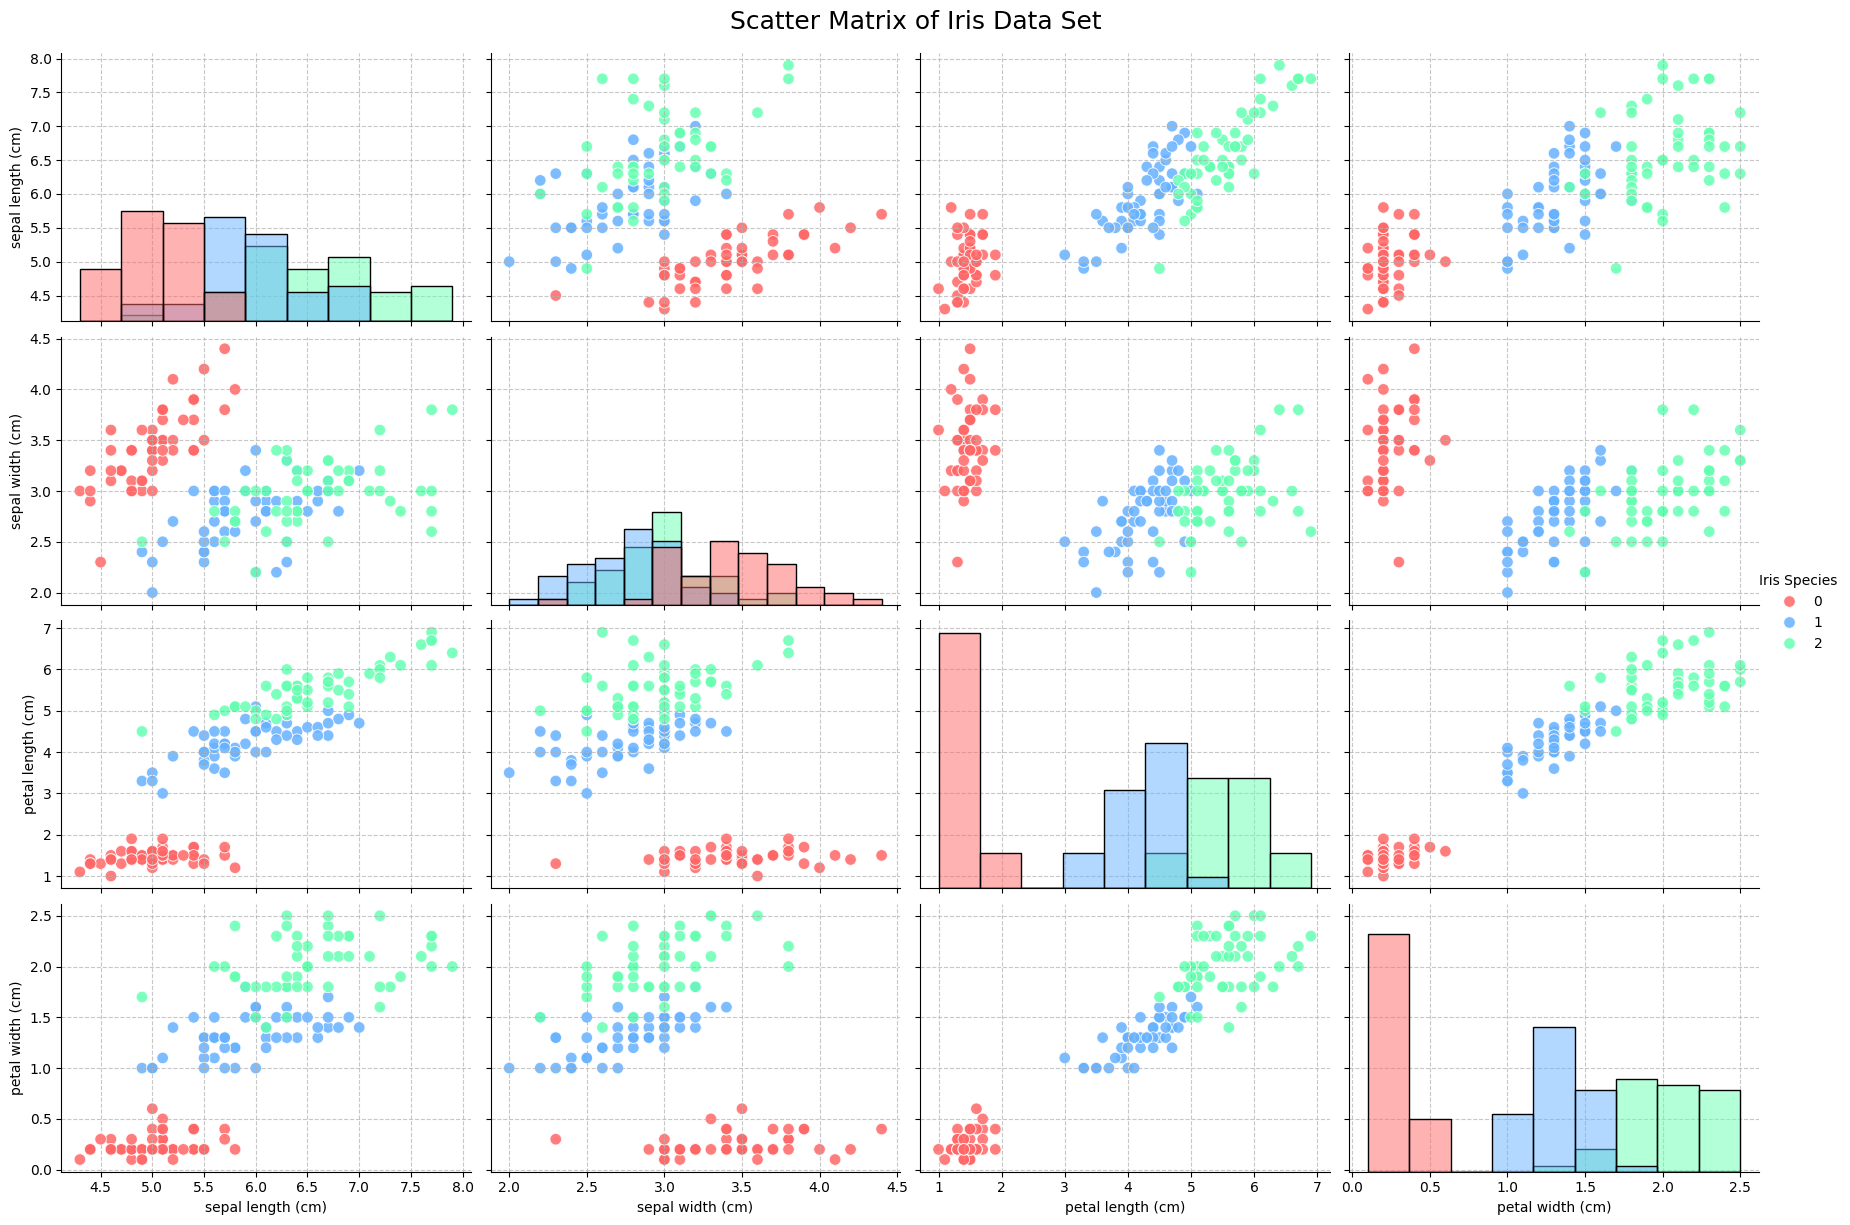

In [141]:
# my favorite plot which I use in my homework assignment

plt.figure(figsize=(32, 18))

# custom color pallete
custom_palette = {
    0: (255/255, 102/255, 102/255),  # light red
    1: (102/255, 178/255, 255/255),  # light blue
    2: (102/255, 255/255, 178/255)   # light green
}

irises_df_species = irises_df_label.copy()
irises_df_species['species'] = irises_df_species['label']
irises_df_species.drop(columns='label', inplace=True)

plot = sns.pairplot(
    irises_df_species,
    hue='species',
    diag_kind='hist',
    height=3,
    aspect=1.5,
    plot_kws={'s': 70, 'alpha': 0.85},
    palette=custom_palette
)


plt.suptitle("Scatter Matrix of Iris Data Set", y=1.02, fontsize=18)

for ax in plot.axes.flatten():
    # set tick values and format
    ax.tick_params(axis='x', labelrotation=0)
    ax.tick_params(axis='y', labelrotation=0)
    ax.grid(True, linestyle='--', alpha=0.7)

# customize legend
plot._legend.set_title('Iris Species')

#### Plot interpretation

The scatter matrix of the Iris dataset presents the relationships among the four features: sepal length, sepal width, petal length, and petal width, categorized by three species: Setosa (0), Versicolor (1), and Virginica (2).

1. Feature Distributions:

The diagonal histograms provide insights into the distribution of each feature across the species. Notably, petal length and petal width display a bimodal distribution, indicating distinct clusters corresponding to the different species.

2. Correlations:

- *Petal Length vs. Petal Width*: A strong positive correlation is observed, as indicated by the upward trend in the scatter plot. This effectively separates Setosa from Versicolor and Virginica.<
- *Sepal Length vs. Sepal Width*: A moderate correlation is noted, with species clustering visible. Setosa points primarily occupy the lower left corner, while Versicolor and Virginica overlap, highlighting potential misclassification challenges.
- *Petal Length vs. Sepal Length*: There is a strong positive correlation suggesting that as sepal length increases, petal length also tends to increase, particularly for Versicolor and Virginica.

3. Species Clustering:

- Setosa is distinctly separate from the other two species in most scatter plots, making it easy to classify based on petal dimensions.
- Versicolor and Virginica show some overlap, especially in sepal dimensions, indicating that while petal measurements are effective for distinguishing species, there may be confusion when relying on sepal measurements alone.

4. Conclusion:

The scatter matrix effectively illustrates the strong correlations between petal dimensions, serving as reliable indicators for species classification. In contrast, while sepal dimensions offer some discriminative power, they exhibit more overlap between Versicolor and Virginica, suggesting the need for a more nuanced approach in predictive modeling for these species.

This analysis emphasizes the importance of selecting the right features for accurate classification and the potential for overlap in species identification based on certain measurements.

The scatter matrix is an excellent tool for early exploratory data analysis (EDA), as it visually represents relationships among multiple features simultaneously. It effectively aids in identifying correlations and clusters of data samples, allowing for a quick assessment of how different variables interact. By examining the scatter matrix, one can easily spot patterns, distributions, and potential overlaps between classes, making it a valuable resource for initial data insights and feature selection in predictive modeling.

In [80]:
def create_correlation_matrix_for_grouped_iris_set():
    groups = irises_df_label.groupby('label')

    corr_matrices = {label: group.drop(columns='label').corr() for label, group in groups}


    plt.figure(figsize=(20, 12))
    plt.suptitle("Correlation Matrixes for each iris group")

    for i, (label, corr_matrix) in enumerate(corr_matrices.items(), 1):
        plt.subplot(1, len(corr_matrices), i)
        sns.heatmap(corr_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1)
        plt.title(f'Group : {label}')
        plt.xticks(rotation=45)
        plt.yticks(rotation=45)

    plt.tight_layout()
    plt.show()


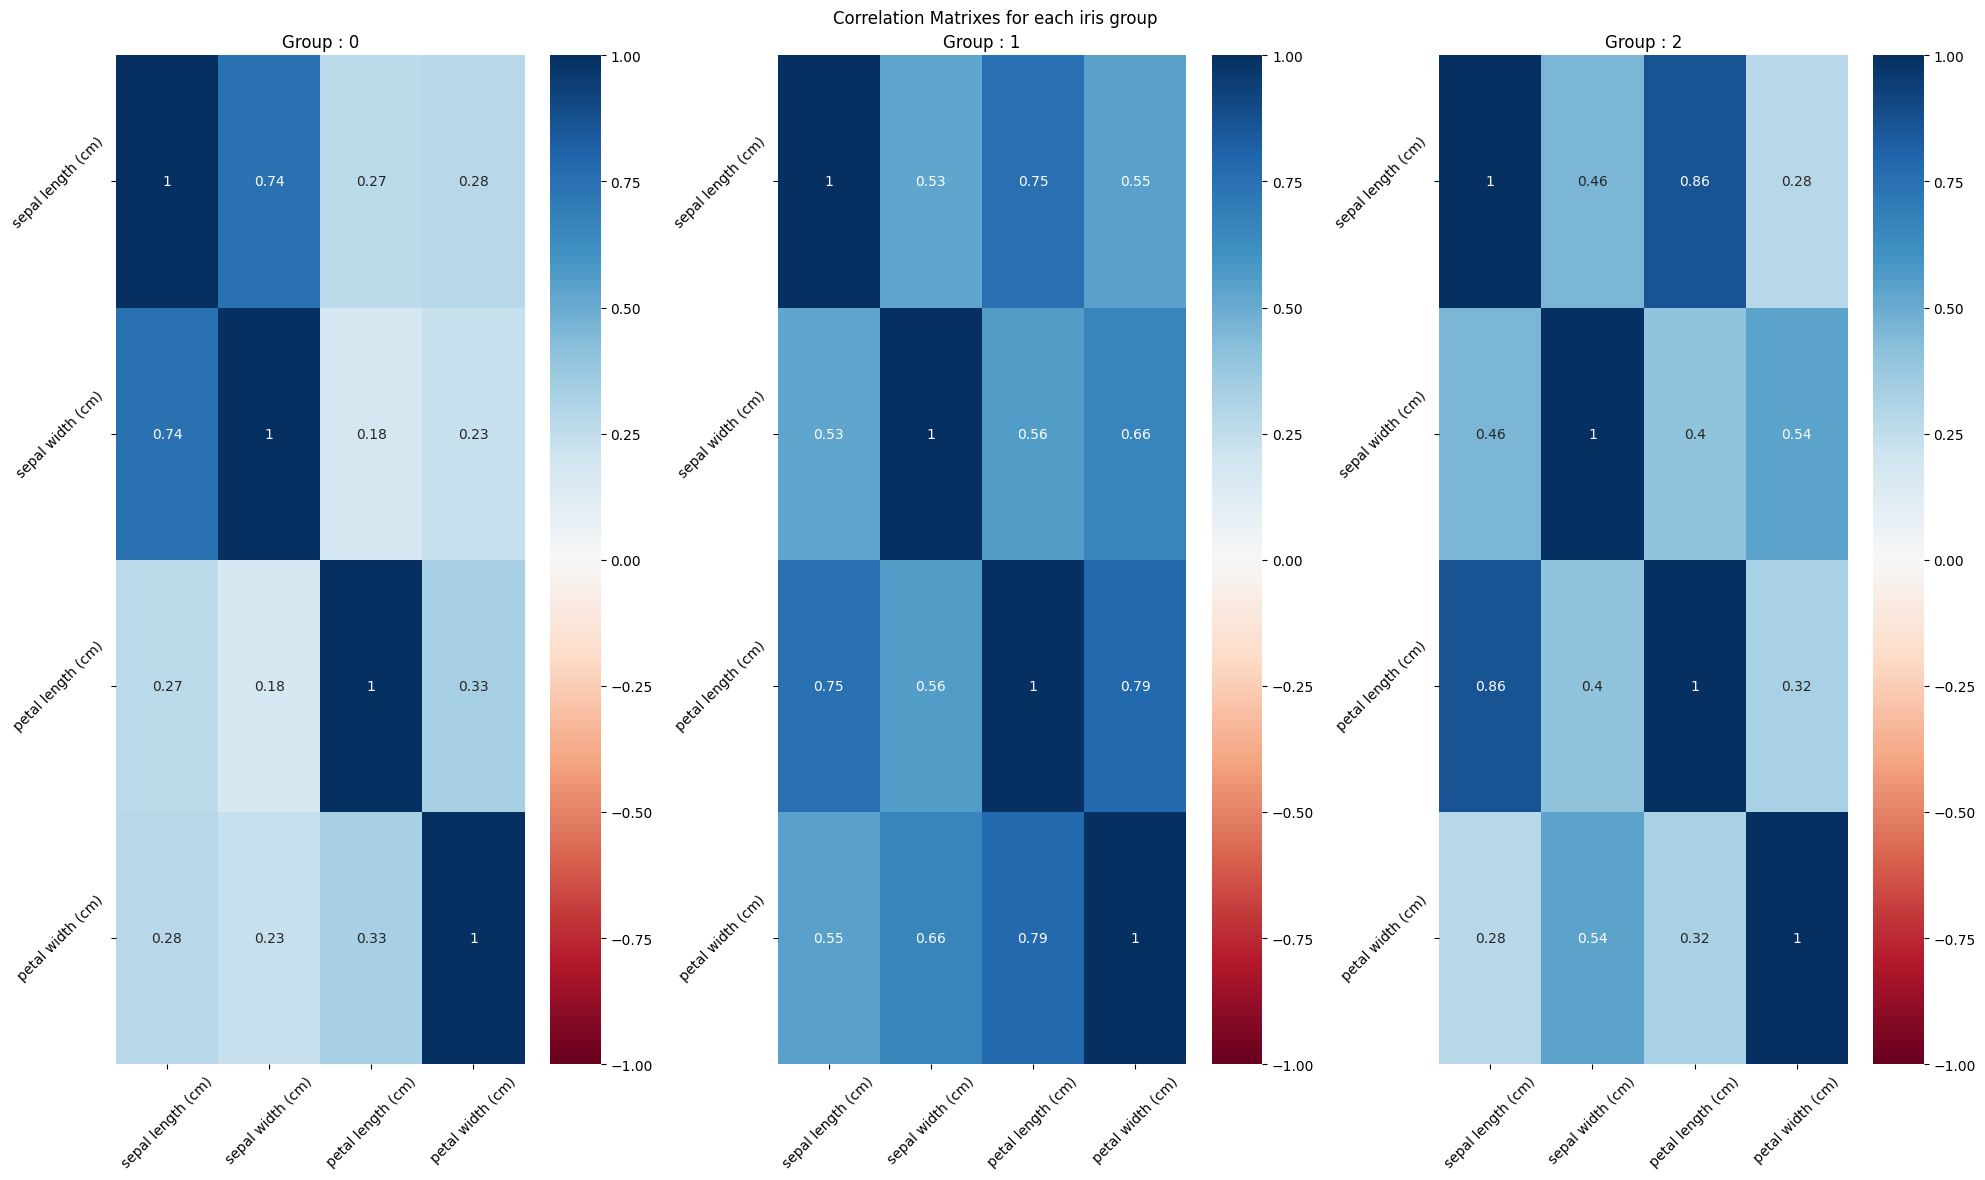

In [81]:
create_correlation_matrix_for_grouped_iris_set()